# Explainer notebook for 02805 Social Graphs - Group 11


We explore how american politicians are connected through wikipedia pages. We use the wikipedia pages of the politicians to create a graph of politicians and their connections. We then analyze several aspects of the graph. 

### Outline


### Packages

In [ ]:
import matplotlib.pyplot as plt 
import pickle
import networkx as nx
import re
import os
import json
import os
from nltk.tokenize import word_tokenize
import json
from tqdm import tqdm
import urllib.request
import requests
from collections import Counter
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import math
import seaborn as sns 
import community as community_louvain
from matplotlib.colors import LogNorm
import pandas as pd
from fa2_modified import ForceAtlas2
from matplotlib import cm
from matplotlib.patches import Patch



## 1. Data loading and preprocessing

### 1.1 Scraping data from wikipedia
The data is scraped from wikipedia using the wikipedia API. We couldn't find a good list of all american politicians, so we had to several lists to get a good coverage of politicians. We then use the wikipedia API to get the links from the wikipedia pages of the politicians.

In [ ]:
def get_category_members(category_name, cmcontinue=None):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "list": "categorymembers",
        "cmtitle": f"Category:{category_name}",
        "cmlimit": "500",  
        "cmcontinue": cmcontinue, 
        "format": "json",
    }
    response = requests.get(url, params=params) 
    data = response.json()
    return data

def get_all_category_members(category_name):
    members = []
    cmcontinue = None

    while True:
        data = get_category_members(category_name, cmcontinue)
        members.extend(data['query']['categorymembers']) 
        
        cmcontinue = data.get('continue', {}).get('cmcontinue')
        if not cmcontinue:
            break

    return [member['title'] for member in members]

politicians21th = get_all_category_members("21st-century American politicians")
politicians20th = get_all_category_members("20th-century American politicians")
politicians21th_presidential_electors = get_all_category_members("21st-century United States presidential electors")
politicians21th_vice_presidents = get_all_category_members("21st-century vice presidents of the United States")
politicians21th_presidents = get_all_category_members("21st-century presidents of the United States")
politicians21th_party_for_soc_and_lib_politicians = get_all_category_members("Party for Socialism and Liberation politicians")
politicians21th_mayors = get_all_category_members("21st-century mayors of places in the United States")
politicians21th_legislators = get_all_category_members("21st-century American legislators")
politicians21th_justice = get_all_category_members("Justice Party (United States) politicians")
politicians21th_green_party = get_all_category_members("Green Party of the United States politicians")
politicians21th_farrigth = get_all_category_members("21st-century American far-right politicians")
politicians21th_soldiarity = get_all_category_members("American Solidarity Party politicians")
politicians21th_delta = get_all_category_members("American Delta Party politicians")
politicians21th_women = get_all_category_members("21st-century American women politicians")
politicians21th_candidates = get_all_category_members("21st-century candidates in United States elections by year")
politicians21th_native = get_all_category_members("21st-century Native American politicians")
politicians21th_state = get_all_category_members("21st-century American politicians by state")
politicians21th_insular = get_all_category_members("21st-century politicians from insular areas of the United States")
politicians21th_african = get_all_category_members("21st-century African-American politicians")

# Save the lists as .txt 
with open("politicians_21st_century.txt", "w", encoding="utf-8") as file_21st:
    for politician in politicians21th:
        file_21st.write(politician + "\n")

with open("politicians_20th_century.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians20th:
        file_20th.write(politician + "\n")
        
with open("politicians21th_presidential_electors.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_presidential_electors:
        file_20th.write(politician + "\n")
        

with open("politicians21th_vice_presidents.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_vice_presidents:
        file_20th.write(politician + "\n")
        

with open("politicians21th_presidents.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_presidents:
        file_20th.write(politician + "\n")
        

with open("politicians21th_party_for_soc_and_lib_politicians.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_party_for_soc_and_lib_politicians:
        file_20th.write(politician + "\n")
        

with open("politicians21th_mayors.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_mayors:
        file_20th.write(politician + "\n")
        

with open("politicians21th_legislators.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_legislators:
        file_20th.write(politician + "\n")
        
with open("politicians21th_justice.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_justice:
        file_20th.write(politician + "\n")
        
with open("politicians21th_green_party.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_green_party:
        file_20th.write(politician + "\n")
        
with open("politicians21th_farrigth.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_farrigth:
        file_20th.write(politician + "\n")
        
with open("politicians21th_soldiarity.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_soldiarity:
        file_20th.write(politician + "\n")
        
with open("politicians21th_delta.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_delta:
        file_20th.write(politician + "\n")
        
with open("politicians21th_women.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_women:
        file_20th.write(politician + "\n")
        
with open("politicians21th_candidates.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_candidates:
        file_20th.write(politician + "\n")
        
with open("politicians21th_native.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_native:
        file_20th.write(politician + "\n")
        
with open("politicians21th_state.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_state:
        file_20th.write(politician + "\n")
        
with open("politicians21th_insular.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_insular:
        file_20th.write(politician + "\n")


with open("politicians21th_african.txt", "w", encoding="utf-8") as file_20th:
    for politician in politicians21th_african:
        file_20th.write(politician + "\n")

In [ ]:
files = os. listdir("Politicians")
politicians = []
for file in files:
    
    with open("Politicians/"+file, "r", encoding="utf8") as f:
        p = f.read()
        p = p.split("\n")
        p = [line for line in p if not line.startswith("Category")]
        p = [line for line in p if line != ""]
        politicians = list(set(politicians + p))

for i,p in enumerate(politicians):

    if i % 100 == 0:
        print(f"Processing politician {i} of {len(politicians)}")

    try:
        baseurl = "https://en.wikipedia.org/w/api.php?"
        action = "action=query"
        title = "titles="+p.replace(" ", "_")
        content = "prop=revisions&rvprop=content"
        dataformat ="format=json"

        query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
        #print(query)

        wikiresponse = urllib.request.urlopen(query)
        wikidata = wikiresponse.read()
        wikitext = wikidata.decode('utf-8')


        js = json.loads(wikitext) 

        #save json to file in contry folder
        with open("../wiki_pages/"+p.replace(" ", "_")+".json", "w", encoding="utf-8") as f:
            json.dump(js, f, ensure_ascii=False, indent=2)
    except:
        print("error with "+p)
        continue


### 1.2 Graph creation
We create a graph of the politicians and their connections by iterating over the wikipedia pages we have collected. We use the links in the wikipedia pages to create the connections between the politicians.

In [ ]:
G = nx.DiGraph()

m = len(os.listdir("../wiki_pages"))
for filename in os.listdir("../wiki_pages"):
    G.add_node(filename[:-5])

for i,filename in enumerate(os.listdir("../wiki_pages")):
    if i % 1000 == 0:
         print(i, "/", m)
   
    with open("../wiki_pages/"+filename, "r", encoding="utf-8") as f:
        try: 
            data = json.load(f)
            
            wikitext = data["query"]["pages"]
            page = list(wikitext.keys())[0]
            wikitext = wikitext[page]["revisions"][0]["*"]

            nb = set(re.findall(r'\[\[([^\|\]]+)(?:\|[^\]]+)?\]\]', wikitext))

            for n in nb:
                n = n.replace(" ", "_")
                if n in G.nodes and not G.has_edge(filename[:-5], n) and filename[:-5] != n:
                    G.add_edge(filename[:-5], n)

        except:
            print(filename)
            continue

G.remove_nodes_from(list(nx.isolates(G)))

pickle.dump(G, open('G_politicans.pickle', 'wb'))

### 1.3 Basic statistics
We look at some basic statistics of the graph, such as the number of nodes and edges, the average degree, and the degree distribution. This is to make sure that the graph is reasonable and that we have collected enough data.

In [ ]:
G = pickle.load(open('G_politicans.pickle', 'rb'))

print(f"Number of nodes: {len(G.nodes())}")
print(f"Number of edges: {len(G.edges())}")
print(f"Max degree: {max(dict(G.degree()).values())}")
print(f"name of vertex with max degree: {max(dict(G.degree()), key=dict(G.degree()).get)}")
print(f"Max out degree: {max(dict(G.out_degree()).values())}")
print(f"name of vertex with max out degree: {max(dict(G.out_degree()), key=dict(G.out_degree()).get)}")
print(f"Max in degree: {max(dict(G.in_degree()).values())}")
print(f"name of vertex with max in degree: {max(dict(G.in_degree()), key=dict(G.in_degree()).get)}")
print(f"Min degree: {min(dict(G.degree()).values())}")
print(f"Average degree: {sum(dict(G.degree()).values())/G.number_of_nodes()}")

Number of nodes: 20534
Number of edges: 80506
Max degree: 1315
name of vertex with max degree: Donald_Trump
Max out degree: 96
name of vertex with max out degree: List_of_politicians_affiliated_with_the_Tea_Party_movement
Max in degree: 1297
name of vertex with max in degree: Donald_Trump
Min degree: 1
Average degree: 7.841238920814259


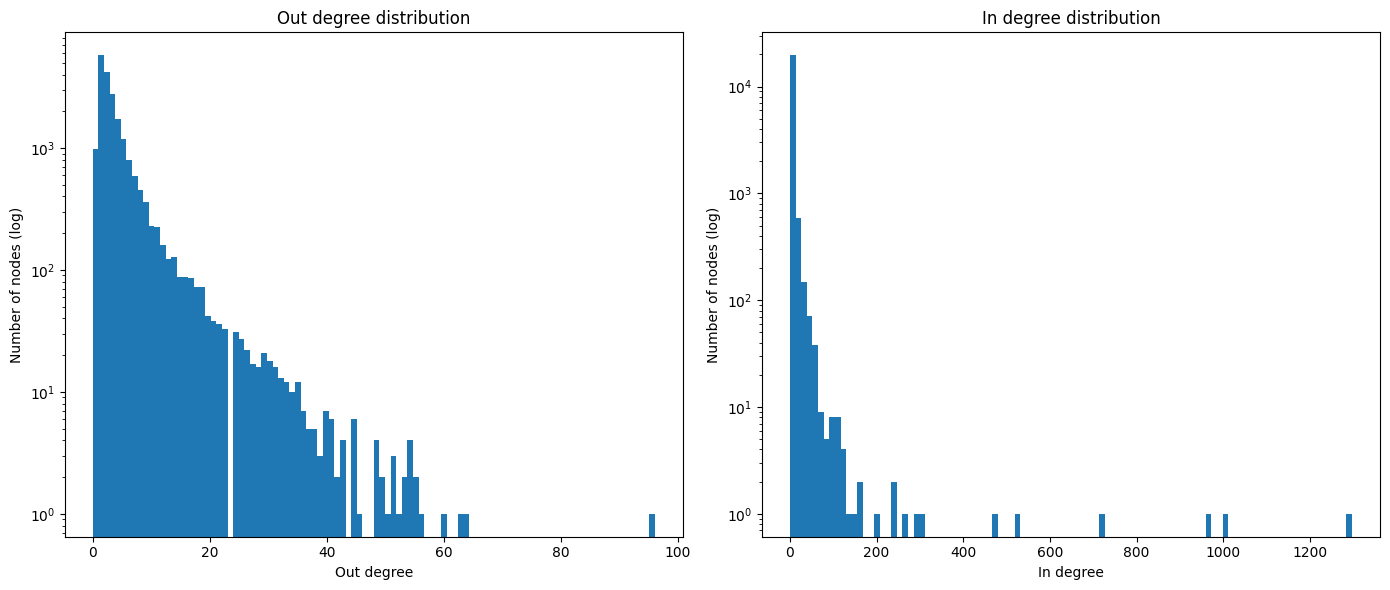

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Out degree distribution
out_degrees = [G.out_degree(n) for n in G.nodes()]
axs[0].hist(out_degrees, bins=100)
axs[0].set_title("Out degree distribution")
axs[0].set_xlabel("Out degree")
axs[0].set_ylabel("Number of nodes (log)")
axs[0].set_yscale('log')

# In degree distribution
in_degrees = [G.in_degree(n) for n in G.nodes()]
axs[1].hist(in_degrees, bins=100)
axs[1].set_title("In degree distribution")
axs[1].set_xlabel("In degree")
axs[1].set_ylabel("Number of nodes (log)")
axs[1].set_yscale('log')

plt.tight_layout()
plt.show()

### 1.4 Node attributes and data cleaning
We collect some attributes of the nodes, such as the party of the politician, gender and sentiment of their wikipedia page. We then remove nodes with missing attributes. We also make sure to remove nodes that are not connected to the main component of the graph.

In [ ]:
# Initialize an empty dictionary
word_dict = {}

# Read the file line by line
with open(r'LabMT_wordlist.txt', 'r', encoding='cp1252') as f:
    # Skip the header line
    next(f)
    for line in f:
        # Split the line into components
        parts = line.strip().split('\t')
        word = parts[0]
        happiness_rank = int(parts[1])
        happiness_average = float(parts[2])
        happiness_standard_deviation = float(parts[3])
        twitter_rank = float(parts[4]) if parts[4] != '--' else None
        google_rank = float(parts[5]) if parts[5] != '--' else None
        nyt_rank = float(parts[6]) if parts[6] != '--' else None
        lyrics_rank = float(parts[7]) if parts[7] != '--' else None
      
        # Add the word and its attributes to the dictionary
        word_dict[word] = {
            'happiness_rank': happiness_rank,
            'happiness_average': happiness_average,
            'happiness_standard_deviation': happiness_standard_deviation,
            'twitter_rank': twitter_rank,
            'google_rank': google_rank,
            'nyt_rank': nyt_rank,
            'lyrics_rank': lyrics_rank
        }

# Function to calculate sentiment for a given text
def calculate_sentiment(text):
    tokens = word_tokenize(text.lower())
    sentiment_sum = 0
    word_count = 0
    for token in tokens:
        if token in word_dict:
            sentiment_sum += word_dict[token]['happiness_average']
            word_count += 1
    if word_count > 0:
        return sentiment_sum / word_count
    else:
        return None

In [ ]:
from tqdm import tqdm

wiki_pages = "./wiki_pages"

for node in tqdm(list(G.nodes()), desc="Processing nodes"):
    node_file = f"{node}.json"
    if os.path.exists(os.path.join(wiki_pages, node_file)):
        with open(os.path.join(wiki_pages, node_file), 'r', encoding="utf-8") as f:
            try:
                data = json.load(f)
                wikitext = data["query"]["pages"]
                page = list(wikitext.keys())[0]
                wikitext = wikitext[page]["revisions"][0]["*"]
                
                # Find party
                match = re.search(r'\bparty\b.*?\|([^]]+)\]\]', wikitext, re.IGNORECASE)
                if match:
                    party = match.group(1)
                    if len(party) < 50:
                        G.nodes[node]['party'] = party
                
                # Find gender
                text = json.dumps(data).lower()
                he_count = len(re.findall(r'\bhe\b|\bhim\b|\bhis\b', text))
                she_count = len(re.findall(r'\bshe\b|\bher\b|\bhers\b', text))
                if he_count > she_count:
                    G.nodes[node]['gender'] = "male"
                elif she_count > he_count:
                    G.nodes[node]['gender'] = "female"
                else:
                    G.nodes[node]['gender'] = "unknown"
                
                # Calculate sentiment
                sentiment = calculate_sentiment(wikitext)
                if sentiment is not None:
                    G.nodes[node]["sentiment"] = sentiment
                else:
                    print(f"Sentiment could not be calculated for {node}")
            except:
                print(f"Error in file: {node_file}")
                continue

In [ ]:
for node in G.nodes():
    if 'party' in G.nodes[node] and (G.nodes[node]['party'] in ['Democratic', 'Democrat', 'Democratic Party', 'Democratic Party (United States)', 'DFL', 'Democratic (DFL)', 'Democratic-Farmer-Labor', 'Democratic–Farmer–Labor', 'Democratic-Farmer-Labor Party', 'Democratic-Farmer-Labor Party (Minnesota)', 'DFL party', 'Farmer-Labor'] or re.search(r'democrat', G.nodes[node]['party'], re.IGNORECASE)):
        G.nodes[node]['party'] = 'Democratic'

    if 'party' in G.nodes[node] and (G.nodes[node]['party'] in ['Republican', 'Republican Party', 'Republican Party (United States)', 'GOP', 'Texas Republican Party'] or re.search(r'republican', G.nodes[node]['party'], re.IGNORECASE)):
        G.nodes[node]['party'] = 'Republican'

    if 'party' in G.nodes[node] and re.search(r'green', G.nodes[node]['party'], re.IGNORECASE):
        G.nodes[node]['party'] = 'Green'

    if 'party' in G.nodes[node] and re.search(r'libertarian', G.nodes[node]['party'], re.IGNORECASE):
        G.nodes[node]['party'] = 'Libertarian'

    if 'party' in G.nodes[node] and re.search(r'independent', G.nodes[node]['party'], re.IGNORECASE):
        G.nodes[node]['party'] = 'Independent'

    if 'party' in G.nodes[node] and re.search(r'socialist', G.nodes[node]['party'], re.IGNORECASE):
        G.nodes[node]['party'] = 'Socialist'
  

parties = ['Democratic', 'Republican', 'Libertarian', 'Green', 'Independent', 'Socialist']
count_party = 0
no_party = 0
for node in G.nodes():
    if 'party' in G.nodes[node] and G.nodes[node]['party'] not in parties:
        # print(f"Node {node} has a party {G.nodes[node]['party']} not in the list of parties.")
        count_party += 1
    if 'party' not in G.nodes[node]:
        no_party += 1

print(f"Total nodes with parties not in the list: {count_party}")
print(f"Total nodes with no party: {no_party}")

party_counts = Counter(nx.get_node_attributes(G, 'party').values())
print(party_counts)

In [ ]:
female_count = sum(1 for _, attr in G.nodes(data=True) if attr.get("gender") == "female")
male_count = sum(1 for _, attr in G.nodes(data=True) if attr.get("gender") == "male")
unknown_count = sum(1 for _, attr in G.nodes(data=True) if attr.get("gender") == "unknown")

print(f"Antal kvinder: {female_count}")
print(f"Antal mænd: {male_count}")
print(f"Antal unknown: {unknown_count}")

In [ ]:
nodes_to_remove1 = [node for node, attr in G.nodes(data=True) if attr.get("gender") == "unknown"]
nodes_to_remove2 = [node for node in G.nodes() if 'party' not in G.nodes[node] or G.nodes[node]['party'] not in parties]
nodes_to_remove3 = [node for node in G.nodes() if 'sentiment' not in G.nodes[node]]

print(f"removing: {len(nodes_to_remove1) + len(nodes_to_remove2) + len(nodes_to_remove3)}", "nodes")

G.remove_nodes_from(nodes_to_remove1)
G.remove_nodes_from(nodes_to_remove2)
G.remove_nodes_from(nodes_to_remove3)

G.remove_nodes_from(list(nx.isolates(G)))

In [ ]:
# save graph object to file
pickle.dump(G, open('G_politicans_final.pickle', 'wb'))

## 2. Analysis

In [111]:
G = pickle.load(open('G_politicans_final.pickle', 'rb'))

### 2.1 Modularity
We partition the graph by party, gender and the louvain method. We then calculate the modularity of the partitions.

In [97]:
# partition the graph after party. 
party_partition = {}
for node in G.nodes(data=True):
    attribute = node[1]['party']
    if attribute not in party_partition:
        party_partition[attribute] = [node[0]]
    else:
        party_partition[attribute].append(node[0])

party_partition_converted = {node: party for party, nodes in party_partition.items() for node in nodes}
party_modularity = community_louvain.modularity(party_partition_converted, G.to_undirected())

print('The graph is divided in', len(party_partition), 'for party')
print(f'The modularity of the partition is {party_modularity:.3f}')

The graph is divided in 6 for party
The modularity of the partition is 0.217


In [98]:
# partition the graph after gender
gender_partition = {}
for node in G.nodes(data=True):
    attribute = node[1]['gender']
    if attribute not in gender_partition:
        gender_partition[attribute] = [node[0]]
    else:
        gender_partition[attribute].append(node[0])

gender_partition_converted = {node: gender for gender, nodes in gender_partition.items() for node in nodes}
gender_modularity = community_louvain.modularity(gender_partition_converted, G.to_undirected())

print('The graph is divided in', len(gender_partition), 'for gender')
print(f'The modularity of the partition is {gender_modularity:.3f}')

The graph is divided in 2 for gender
The modularity of the partition is 0.045


In [101]:
# use louvain method to partition the graph
louvain_partition = community_louvain.best_partition(G.to_undirected(), random_state=11)
louvain_modularity = community_louvain.modularity(louvain_partition, G.to_undirected())

print('The graph is divided in', len(set(louvain_partition.values())), 'for louvain')
print(f'The modularity of the partition is {louvain_modularity:.3f}')

The graph is divided in 737 for louvain
The modularity of the partition is 0.686


In [155]:
community_sizes = Counter(louvain_partition.values())
most_common_communities = community_sizes.most_common(6)
# Calculate how many nodes are in one of the 10 most common communities
most_common_communities_nodes = sum(size for community, size in most_common_communities)
print(f"Percentage of nodes in the 10 most common communities: {most_common_communities_nodes / len(G.nodes) * 100:.2f}%")

Percentage of nodes in the 10 most common communities: 32.76%


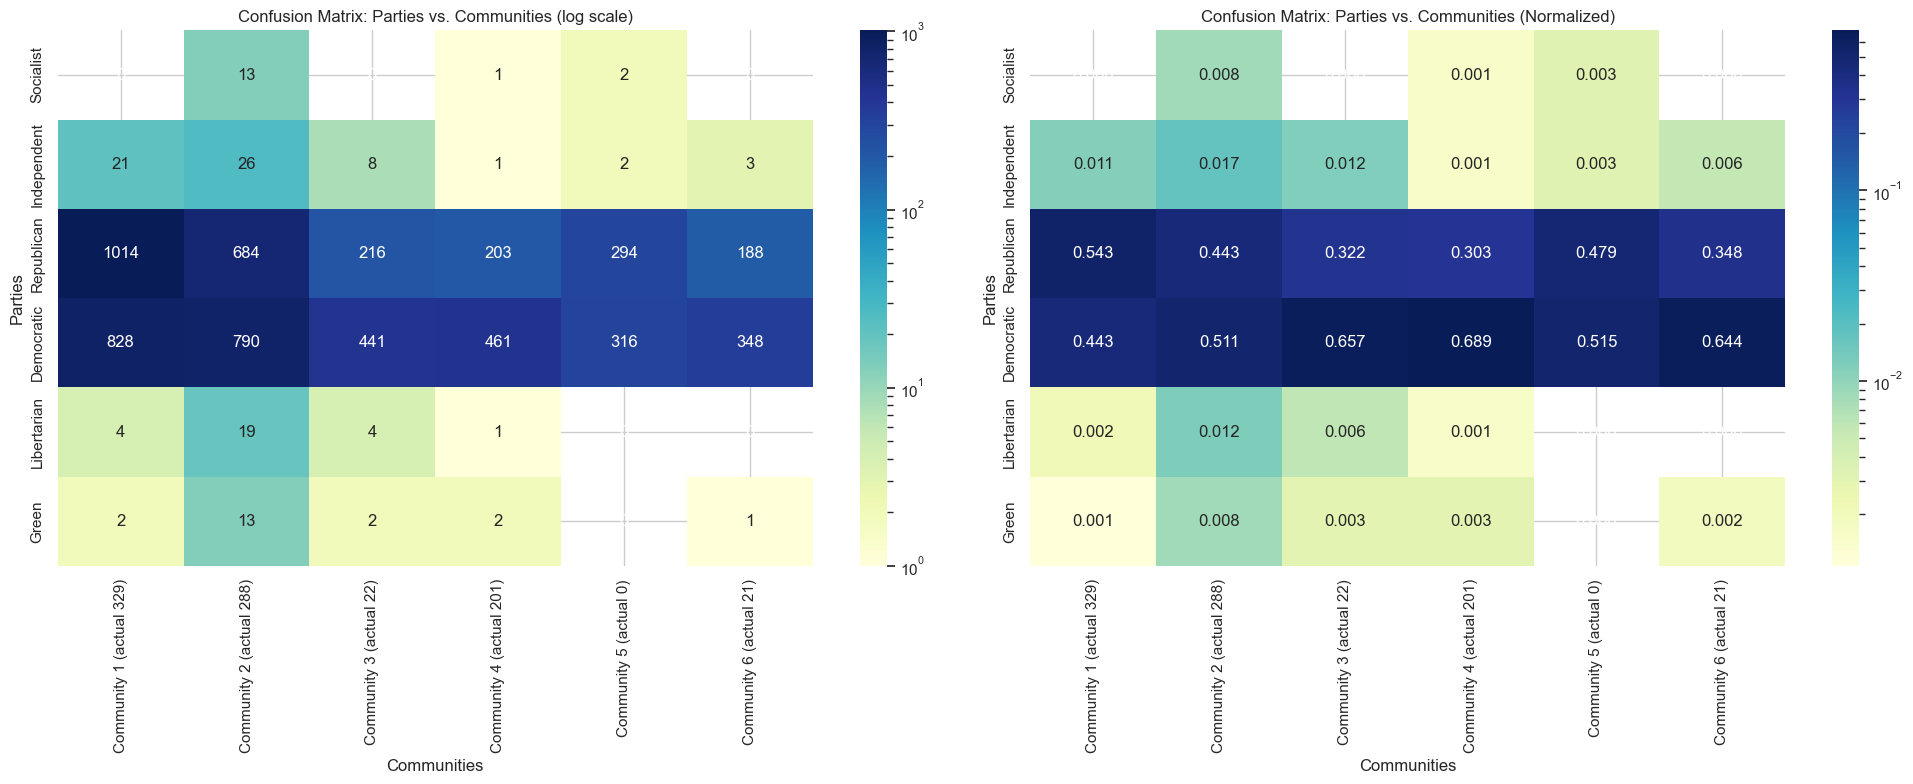

In [156]:
parties = set(nx.get_node_attributes(G, 'party').values())
parties_array = np.array(list(parties))

# Create the confusion matrix D
D = np.zeros((len(parties), len(most_common_communities)), dtype=int)

# Populate the matrix D
for i, party in enumerate(parties_array):
    for j, (community, _) in enumerate(most_common_communities):
        count = sum(1 for node in G.nodes if G.nodes[node].get('party') == party and louvain_partition[node] == community)
        D[i, j] = count

# Normalize the confusion matrix D
D_normalized = D / D.sum(axis=0, keepdims=True)

# Define the labels for the parties and communities
party_labels = parties_array
community_labels = [f'Community {i+1} (actual {community})' for i, (community, _) in enumerate(most_common_communities)]

# Create the heatmap with normalized values
plt.figure(figsize=(20, 8))

# Plot the original confusion matrix D
plt.subplot(1, 2, 1)
sns.heatmap(D, annot=True, fmt='d', cmap='YlGnBu', xticklabels=community_labels, yticklabels=party_labels, norm=LogNorm())
plt.xlabel('Communities')
plt.ylabel('Parties')
plt.title('Confusion Matrix: Parties vs. Communities (log scale)')

# Plot the normalized confusion matrix D_normalized
plt.subplot(1, 2, 2)
sns.heatmap(D_normalized, annot=True, fmt='.3f', cmap='YlGnBu', xticklabels=community_labels, yticklabels=party_labels, norm=LogNorm())
plt.xlabel('Communities')
plt.ylabel('Parties')
plt.title('Confusion Matrix: Parties vs. Communities (Normalized)')

plt.tight_layout()
plt.show()

### 2.2 Friendship paradox
We calculate the friendship paradox for the graph. We then calculate the friendship paradox for the partitions we created in 2.1.

In [113]:
def friendship_paradox(G):
    # We calculated the fraction of nodes, which have a degree less than the mean degree
    # of their neighbors in F-BA for all nodes instead of a random sample of 1000 nodes.
    paradox = 0 
    for node in G.nodes:
        nb = list(G.neighbors(node))
        if nb:  # Check if the list of neighbors is not empty
            nbavgnb = np.mean([G.degree(n) for n in nb])
            if G.degree[node] < nbavgnb: 
                paradox += 1 

    fraction_paradox = paradox / len(G.nodes)

    return fraction_paradox

fraction_paradox = friendship_paradox(G)
print(f"Fraction of nodes, which have a degree less than the mean degree of their neighbors: {fraction_paradox:.3f}")

Fraction of nodes, which have a degree less than the mean degree of their neighbors: 0.773


### 2.3 TF-IDF

#### 2.3.1 Data for party TF-IDF

In [ ]:
parent_directory = os.path.abspath(os.path.join(os.getcwd(), ".."))
artist_files_dir = os.path.join(parent_directory, "wiki_pages") 
output_dir = 'party_aggregated_text'

os.makedirs(output_dir, exist_ok=True)
def clean_text(text):
    # Remove Wikipedia markup and unwanted sections
    cleaned_text = re.sub(r'\{\{.*?\}\}', '', text, flags=re.DOTALL)  # Remove infoboxes
    cleaned_text = re.sub(r'={2,}.*?={2,}', '', cleaned_text)  # Remove section headers
    cleaned_text = re.sub(r'\[\[.*?\]\]', '', cleaned_text)  # Remove internal links
    cleaned_text = re.sub(r'\[http[^\]]+\]', '', cleaned_text)  # Remove external links
    cleaned_text = re.sub(r'<ref>.*?</ref>', '', cleaned_text, flags=re.DOTALL)  # Remove <ref> tags
    cleaned_text = re.sub(r'\{.*?\}', '', cleaned_text, flags=re.DOTALL)  # Remove curly braces content
    cleaned_text = re.sub(r'<.*? colspan\s*=\s*".*?".*?>', '', cleaned_text)  # Remove HTML tags with colspan attribute
    cleaned_text = re.sub(r'<.*? rowspans*=".*?".*?>', '', cleaned_text)  # Remove HTML tags with rowspan attribute
    cleaned_text = re.sub(r'<.*?>', '', cleaned_text)  # Remove all HTML tags
    cleaned_text = re.sub(r'<table.*?>.*?</table>', '', cleaned_text, flags=re.DOTALL)  # Remove whole tables
    cleaned_text = re.sub(r'\|}', '', cleaned_text)  # Remove table closing tags
    cleaned_text = re.sub(r'<small>.*?</small>', '', cleaned_text, flags=re.DOTALL)  # Remove <small> tags
    cleaned_text = re.sub(r'^\s*$', '', cleaned_text, flags=re.MULTILINE)  # Remove empty lines
    cleaned_text = cleaned_text.replace("—", "")  # Remove dash characters
    cleaned_text = cleaned_text.strip()  # Remove leading/trailing whitespace
    return cleaned_text
# Dictionary to hold aggregated text for each genre
aggregated_content = {}

for _, party in enumerate(np.array(list(set(nx.get_node_attributes(G, 'party').values())))):
    aggregated_content[party] = []
    partymembers = [node for node, data in G.nodes(data=True) if data.get('party') == party]
   
    # Read each artist's text file
    for partymember in partymembers:
        member_file_path = os.path.join(artist_files_dir, f'{partymember}.json')
        print(member_file_path)
        if os.path.exists(member_file_path):
            with open(member_file_path, 'r', encoding='utf-8') as file:
                member_text = file.read()
                cleaned_member_text = clean_text(member_text)
                aggregated_content[party].append(cleaned_member_text)

    output_file_path = os.path.join(output_dir, f'{party}.txt')  # Output file for the genre
    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        output_file.write(f'Party: {party}\n')
        output_file.write('\n'.join(aggregated_content[party]) + '\n')


# now we create the term frequency for each words in each of the aggregated genre files.
text_folder = r"party_aggregated_text"
output_folder = r"party_aggregated_text_TF"

os.makedirs(output_folder, exist_ok=True)

def extract_words(text):
    text = re.sub(r'[^\w\s]', '', text)  
    words = text.lower().split()  
    return words

for filename in os.listdir(text_folder):
    if filename.endswith('.txt'):
        try:
            with open(os.path.join(text_folder, filename), 'r', encoding='utf-8') as f:
                content = f.read()                
                words = extract_words(content)
                word_counts = Counter(words)
                output_file = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_tf.txt")
                with open(output_file, 'w', encoding='utf-8') as output:
                    for word, count in word_counts.items():
                        output.write(f"{word} {count}\n")
        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")


text_folder = r"party_aggregated_text_TF"
doc_count = 0
term_doc_count = defaultdict(int)

for filename in os.listdir(text_folder):
    if filename.endswith('.txt'):
        try:
            # read content of file 
            with open(os.path.join(text_folder, filename), 'r', encoding='utf-8') as f:
                content = f.read()
                doc_count += 1  # opdate number of dokuments
                # get the unique words 
                unique_words = set(extract_words(content))
                # opdate document count 
                for word in unique_words:
                    term_doc_count[word] += 1

        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

#calculate idf for each word/term 
idf_scores = {term: math.log(doc_count / count) for term, count in term_doc_count.items()}

# save the idf score in the same folder as tf
output_idf_file = os.path.join(text_folder, "idf_scores.txt")
with open(output_idf_file, 'w', encoding='utf-8') as output:
    for term, score in idf_scores.items():
        output.write(f"{term} {score}\n")

#### 2.3.2 TF-IDF for party

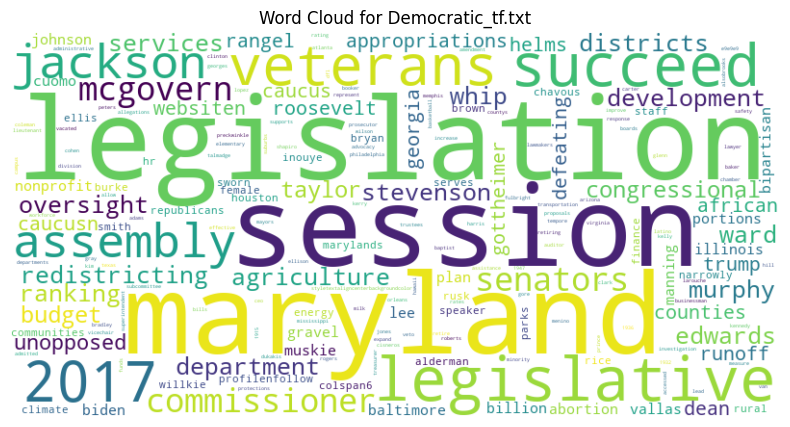

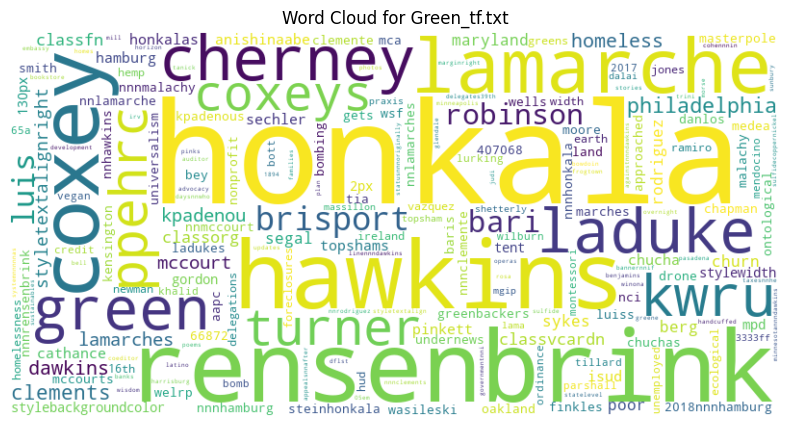

An error occurred while processing idf_scores.txt: invalid literal for int() with base 10: '1.791759469228055'


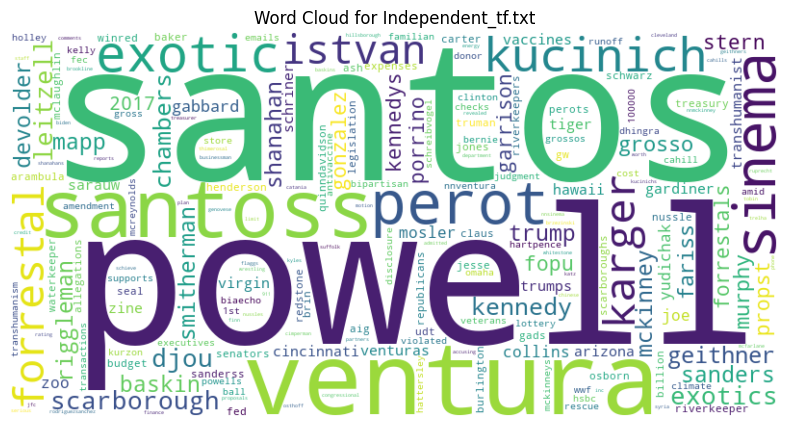

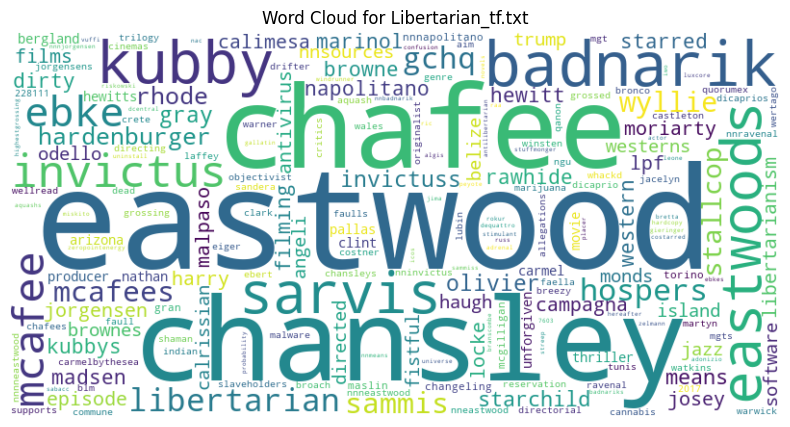

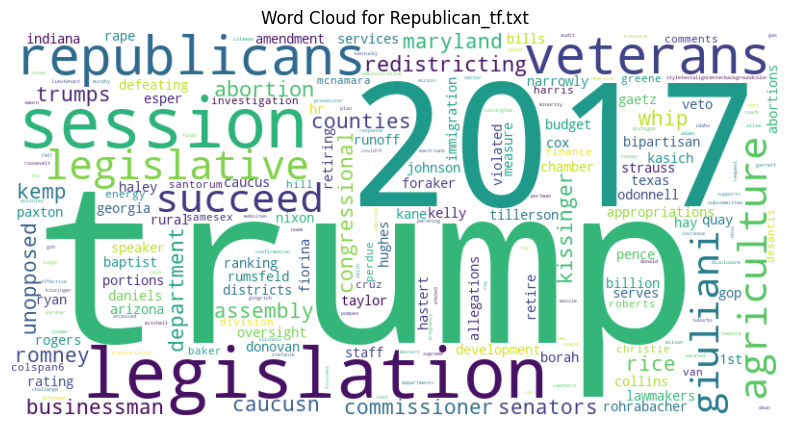

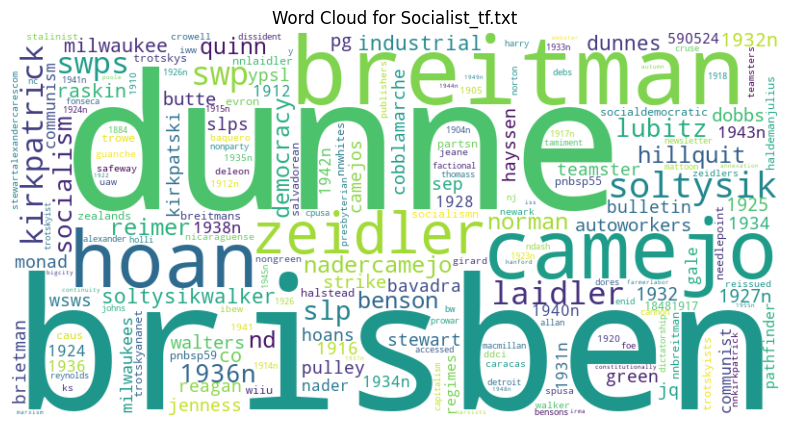

In [121]:
# Time to visualize the word clouds for the genres based on the TF-IDF scores. 
tf_folder = r"party_aggregated_text_TF"
idf_file_path = r"party_aggregated_text_TF/idf_scores.txt"

idf_scores = {}
with open(idf_file_path, 'r', encoding='utf-8') as idf_file:
    for line in idf_file:
        word, score = line.strip().split()
        idf_scores[word] = float(score)

for filename in os.listdir(tf_folder):
    if filename.endswith('.txt'): 
        try:
            tf_scores = {}
            with open(os.path.join(tf_folder, filename), 'r', encoding='utf-8') as tf_file:
                for line in tf_file:
                    word, count = line.strip().split()
                    tf_scores[word] = int(count)

            # compute the TF-IDF score 
            tfidf_scores = {word: tf * idf_scores.get(word, 0) for word, tf in tf_scores.items()}
            # create wordcloud
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)

            # plot wordcloud
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')  
            plt.title(f'Word Cloud for {filename}')
            plt.show()
            # wordcloud_file_path = os.path.join(tf_folder, f'{os.path.splitext(filename)[0]}_wordcloud.png')
            # wordcloud.to_file(wordcloud_file_path)

        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

#### 2.3.3 Data for louvain TF-IDF

In [ ]:
parent_directory = os.path.abspath(os.path.join(os.getcwd(), ".."))
artist_files_dir = os.path.join(parent_directory, "wiki_pages") 
output_dir = '6_largest_communities_aggregated_text'  
os.makedirs(output_dir, exist_ok=True)
aggregated_content = {}

for i in range(6):
    aggregated_content[i] = []
    partymembers = most_common_communities[i]

    for partymember in partymembers:
        member_file_path = os.path.join(artist_files_dir, f'{partymember}.json')  # Assuming file names match artist names
        print(member_file_path)
        if os.path.exists(member_file_path):
            with open(member_file_path, 'r', encoding='utf-8') as file:
                member_text = file.read()
                cleaned_member_text = clean_text(member_text)
                aggregated_content[i].append(cleaned_member_text)

    # Write the aggregated content to a separate file for the current genre
    output_file_path = os.path.join(output_dir, f'{i}.txt')  # Output file for the genre
    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        output_file.write(f'i: {i}\n')
        output_file.write('\n'.join(aggregated_content[i]) + '\n')

# now we create the term frequency for each words in each of the aggregated community files.
text_folder = r"6_largest_communities_aggregated_text"
output_folder = r"6_largest_communities_aggregated_text_TF"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(text_folder):
    if filename.endswith('.txt'):
        try:           
            with open(os.path.join(text_folder, filename), 'r', encoding='utf-8') as f:
                content = f.read()                
                words = extract_words(content)              
                word_counts = Counter(words)
                output_file = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_tf.txt")
                with open(output_file, 'w', encoding='utf-8') as output:
                    for word, count in word_counts.items():
                        output.write(f"{word} {count}\n")
        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

# time to compute the IDF scores
text_folder = r"6_largest_communities_aggregated_text_TF"
doc_count = 0
term_doc_count = defaultdict(int)

for filename in os.listdir(text_folder):
    if filename.endswith('.txt'):
        try:
            # read content of file 
            with open(os.path.join(text_folder, filename), 'r', encoding='utf-8') as f:
                content = f.read()
                doc_count += 1  # opdate number of dokuments

                # get the unique words 
                unique_words = set(extract_words(content))

                # opdate document count 
                for word in unique_words:
                    term_doc_count[word] += 1

        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

#calculate idf for each word/term 
idf_scores = {term: math.log(doc_count / count) for term, count in term_doc_count.items()}

# save the idf score in the same folder as tf
output_idf_file = os.path.join(text_folder, "idf_scores.txt")
with open(output_idf_file, 'w', encoding='utf-8') as output:
    for term, score in idf_scores.items():
        output.write(f"{term} {score}\n")

#### 2.3.4 TF-IDF for louvain

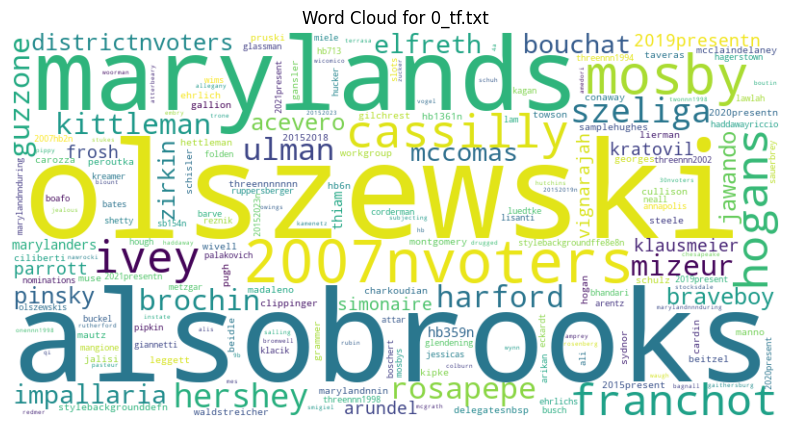

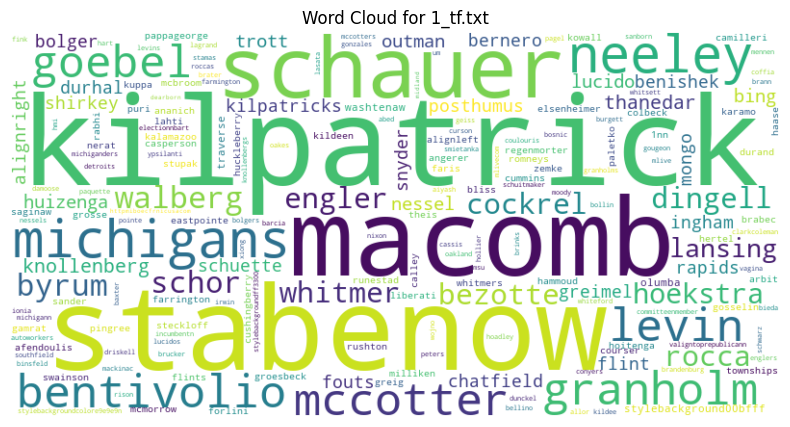

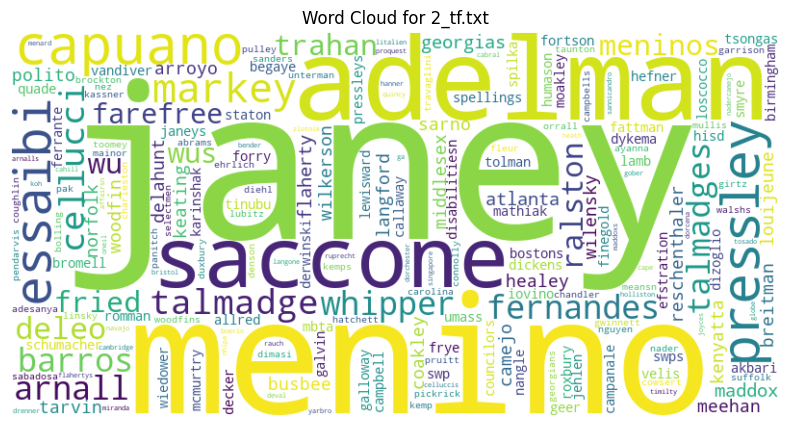

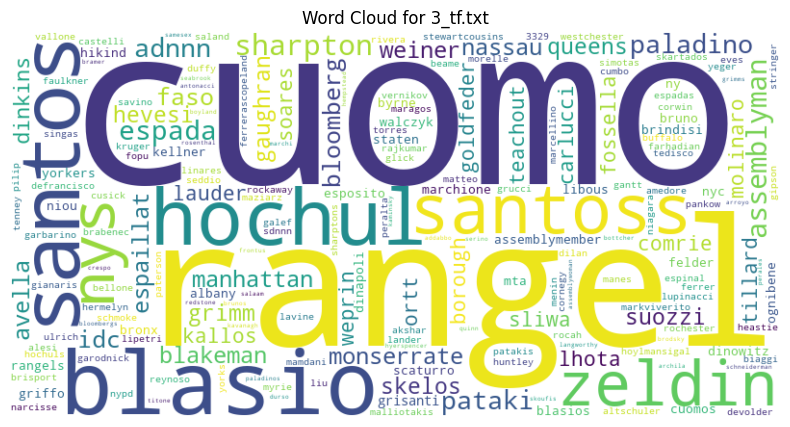

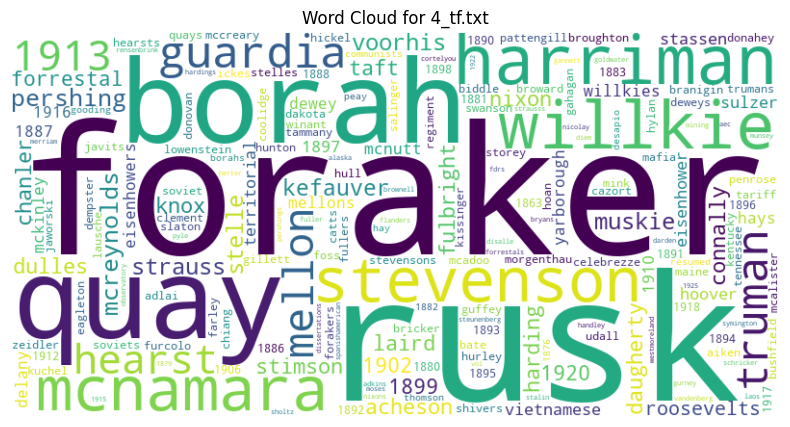

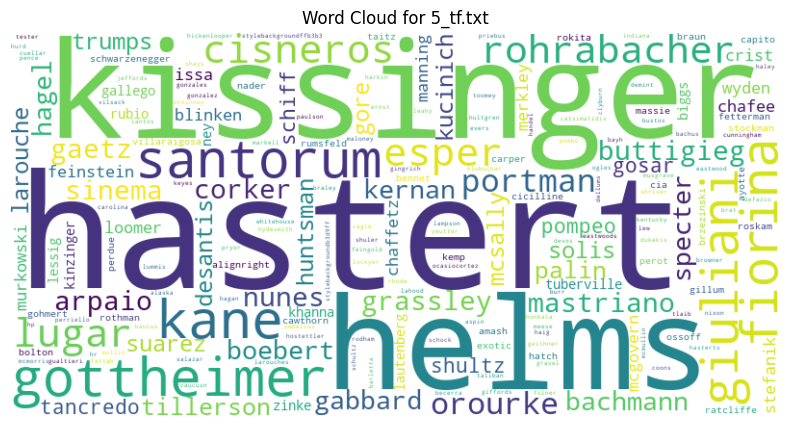

An error occurred while processing idf_scores.txt: invalid literal for int() with base 10: '1.0986122886681098'


In [123]:
# Time to visualize the word clouds for the genres based on the TF-IDF scores. 
tf_folder = r"6_largest_communities_aggregated_text_TF"
idf_file_path = r"6_largest_communities_aggregated_text_TF/idf_scores.txt"

idf_scores = {}
with open(idf_file_path, 'r', encoding='utf-8') as idf_file:
    for line in idf_file:
        word, score = line.strip().split()
        idf_scores[word] = float(score)

for filename in os.listdir(tf_folder):
    if filename.endswith('.txt'): 
        try:
            tf_scores = {}
            with open(os.path.join(tf_folder, filename), 'r', encoding='utf-8') as tf_file:
                for line in tf_file:
                    word, count = line.strip().split()
                    tf_scores[word] = int(count)
            # compute the TF-IDF score 
            tfidf_scores = {word: tf * idf_scores.get(word, 0) for word, tf in tf_scores.items()}
            # create wordcloud
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_scores)
            # plot wordcliud
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')  
            plt.title(f'Word Cloud for {filename}')
            plt.show()  
            # wordcloud_file_path = os.path.join(tf_folder, f'{os.path.splitext(filename)[0]}_wordcloud.png')
            # wordcloud.to_file(wordcloud_file_path)

        except Exception as e:
            print(f"An error occurred while processing {filename}: {e}")

### 2.4 Sentiment analysis

In [133]:
# Extract sentiment values from the graph nodes
sentiments = np.array([data['sentiment'] for _, data in G.nodes(data=True)])

# Calculate statistics
average_sentiment = np.mean(sentiments)
median_sentiment = np.median(sentiments)
variance_sentiment = np.var(sentiments)
percentile_25 = np.percentile(sentiments, 25)
percentile_75 = np.percentile(sentiments, 75)

print(f"Average Sentiment: {average_sentiment}")
print(f"Median Sentiment: {median_sentiment}")
print(f"Variance of Sentiment: {variance_sentiment}")
print(f"25th Percentile of Sentiment: {percentile_25}")
print(f"75th Percentile of Sentiment: {percentile_75}")

Average Sentiment: 5.482521346009273
Median Sentiment: 5.478842224744604
Variance of Sentiment: 0.009761448093861825
25th Percentile of Sentiment: 5.413215859030842
75th Percentile of Sentiment: 5.547513812154697


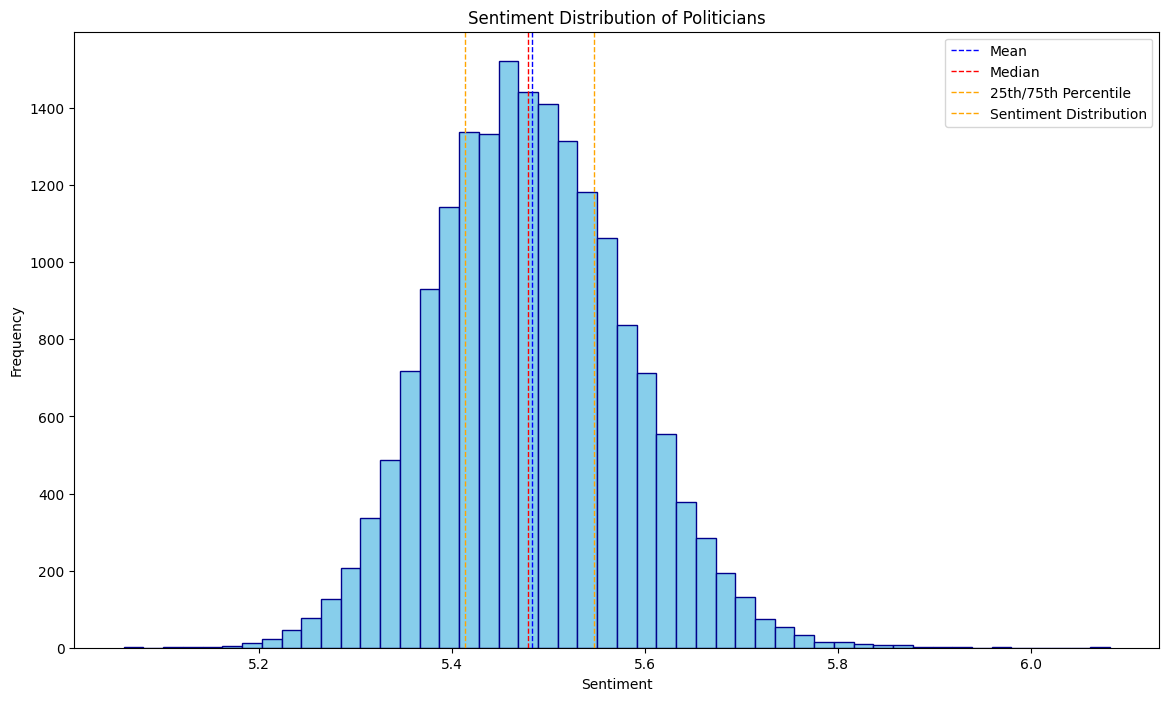

In [134]:
hist = np.histogram(sentiments, bins=50)
plt.figure(figsize=(14, 8))
plt.bar(hist[1][:-1], hist[0], width=np.diff(hist[1]), align='edge', edgecolor='darkblue', color='skyblue')
plt.axvline(average_sentiment, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(median_sentiment, color='red', linestyle='dashed', linewidth=1)
plt.axvline(percentile_25, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(percentile_75, color='orange', linestyle='dashed', linewidth=1)
plt.legend(['Mean', 'Median', '25th/75th Percentile', 'Sentiment Distribution'])
plt.title('Sentiment Distribution of Politicians')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

In [146]:
# Sort the nodes by sentiment
node_sentiment = nx.get_node_attributes(G, 'sentiment')
sorted_sentiments = sorted(node_sentiment.items(), key=lambda x: x[1], reverse=True)

print("Top 5 happiest nodes:")
for person, sentiment in sorted_sentiments[:5]:
    party = G.nodes[person].get('party', 'Unknown')
    print(f"{person}: {sentiment:.2f} valence, Party: {party}")
print()
print("Top 5 saddest nodes:")
for person, sentiment in sorted_sentiments[-1:-6:-1]:
    party = G.nodes[person].get('party', 'Unknown')
    print(f"{person}: {sentiment:.2f} valence, Party: {party}")

Top 5 happiest nodes:
Kenneth_R._Plum: 6.08 valence, Party: Democratic
Dennis_Cohoon: 6.07 valence, Party: Democratic
Steven_Thayn: 5.97 valence, Party: Republican
Joe_Plouff: 5.96 valence, Party: Democratic
Evan_Worrell: 5.92 valence, Party: Republican

Top 5 saddest nodes:
Lloyd_Emerson_Roulet: 5.06 valence, Party: Republican
Russell_G._Lloyd_Sr.: 5.10 valence, Party: Republican
David_C._Poindexter: 5.11 valence, Party: Republican
Aaron_von_Ehlinger: 5.12 valence, Party: Republican
Hank_Coe: 5.14 valence, Party: Republican


C:\Users\Mathilde\AppData\Local\Temp\ipykernel_15584\2831037302.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Party', y='Sentiment', data=df, palette="Set3")


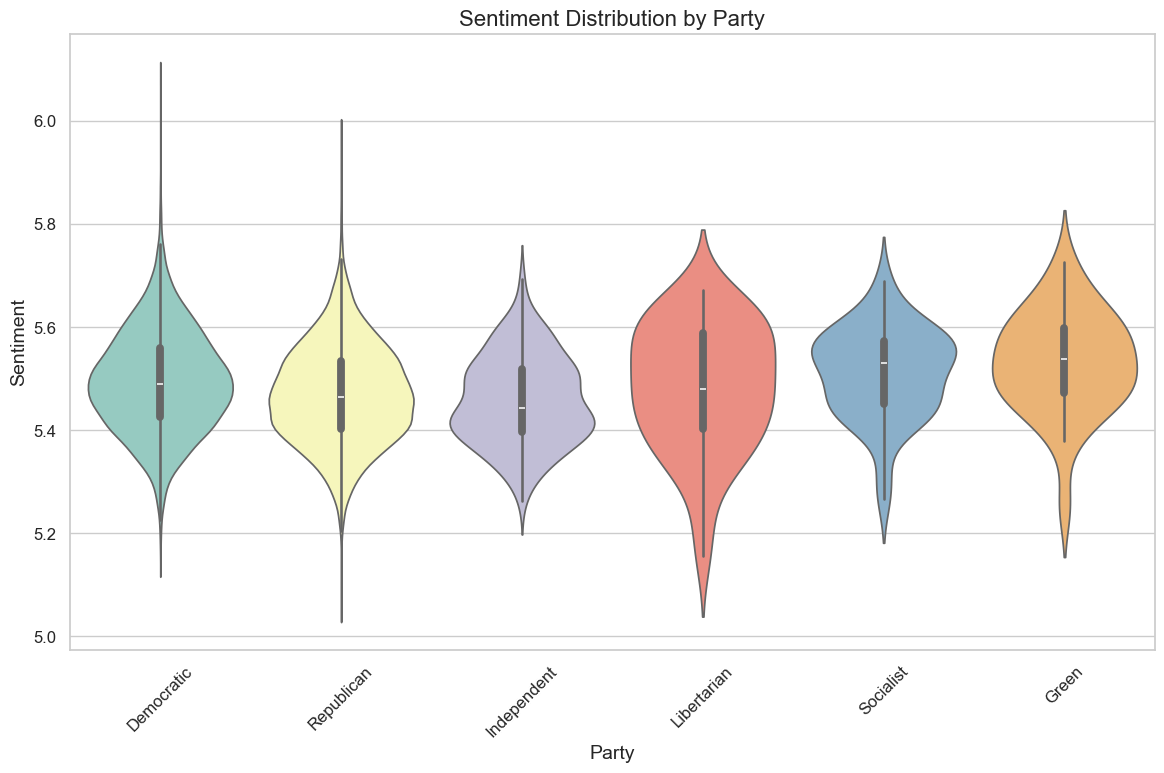

In [150]:
# Extract sentiment and party information from the graph nodes
node_data = [(data['sentiment'], data.get('party', 'Unknown')) for _, data in G.nodes(data=True) if 'sentiment' in data]

# Create a DataFrame for easier plotting
df = pd.DataFrame(node_data, columns=['Sentiment', 'Party'])

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 8))
sns.violinplot(x='Party', y='Sentiment', data=df, palette="Set3")
plt.title('Sentiment Distribution by Party', fontsize=16)
plt.xlabel('Party', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\Mathilde\AppData\Local\Temp\ipykernel_15584\3117288335.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Community', y='Sentiment', data=df, palette="Set3", order=df['Community'].unique())


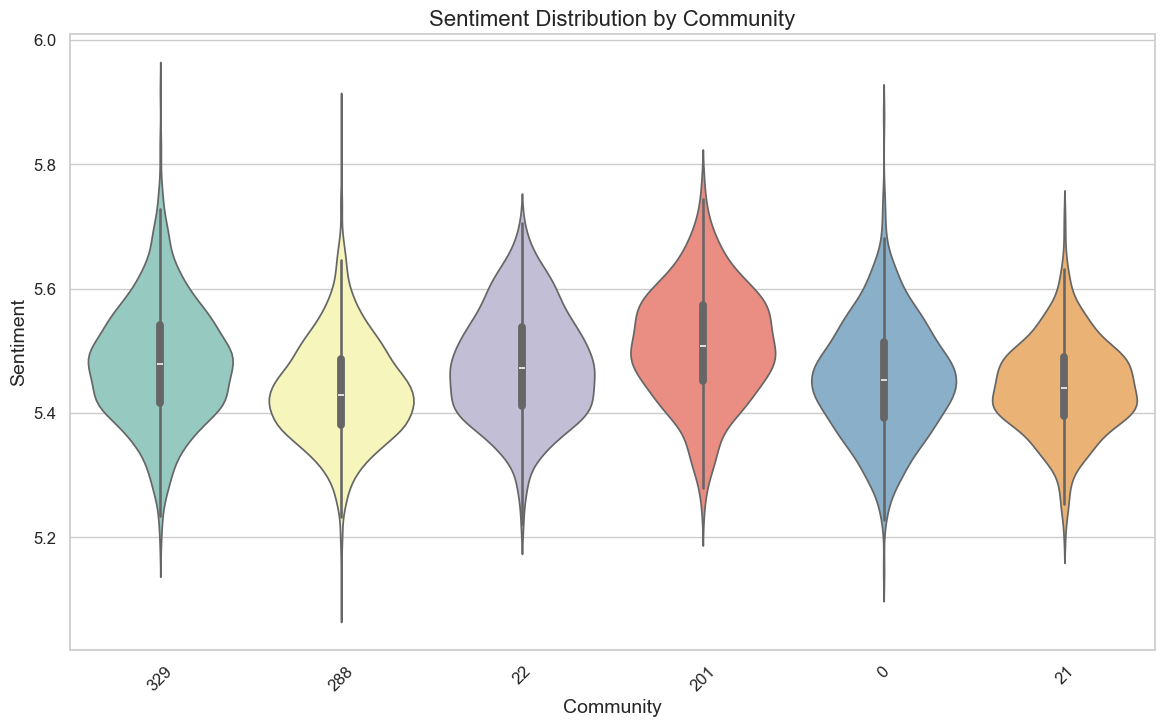

In [158]:
# Extract sentiment and community information from the graph nodes
node_data = [(data['sentiment'], louvain_partition[node]) for node, data in G.nodes(data=True) if 'sentiment' in data]

# Create a DataFrame for easier plotting
df = pd.DataFrame(node_data, columns=['Sentiment', 'Community'])

# Filter for the 6 most common communities
most_common_communities_indices = [community for community, _ in most_common_communities[:6]]
df = df[df['Community'].isin(most_common_communities_indices)]

# Sort the DataFrame by community size
community_size_dict = dict(most_common_communities[:6])
df['Community Size'] = df['Community'].map(community_size_dict)
df = df.sort_values(by='Community Size', ascending=False)

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(14, 8))
sns.violinplot(x='Community', y='Sentiment', data=df, palette="Set3", order=df['Community'].unique())
plt.title('Sentiment Distribution by Community', fontsize=16)
plt.xlabel('Community', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 3. Visualization

### 3.1 Sentiment

In [ ]:
H = G.to_undirected()

[]

In [162]:
# Initialize ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # linear attraction (default)
    adjustSizes=False,  # Prevent overlap
    edgeWeightInfluence=1.0,

    # Performance and scaling
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,  # Optimize for larger graphs
    barnesHutTheta=1.2,
    scalingRatio=4.0,
    strongGravityMode=False,
    gravity=0.8,
    # Log
    verbose=True
)

# Apply the ForceAtlas2 layout to the graph
positions = forceatlas2.forceatlas2_networkx_layout(H, iterations=100)

100%|██████████| 100/100 [03:58<00:00,  2.38s/it]

BarnesHut Approximation  took  22.33  seconds
Repulsion forces  took  212.75  seconds
Gravitational forces  took  0.33  seconds
Attraction forces  took  0.30  seconds
AdjustSpeedAndApplyForces step  took  1.21  seconds


C:\Users\Mathilde\AppData\Local\Temp\ipykernel_15584\4196978233.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Sentiment')


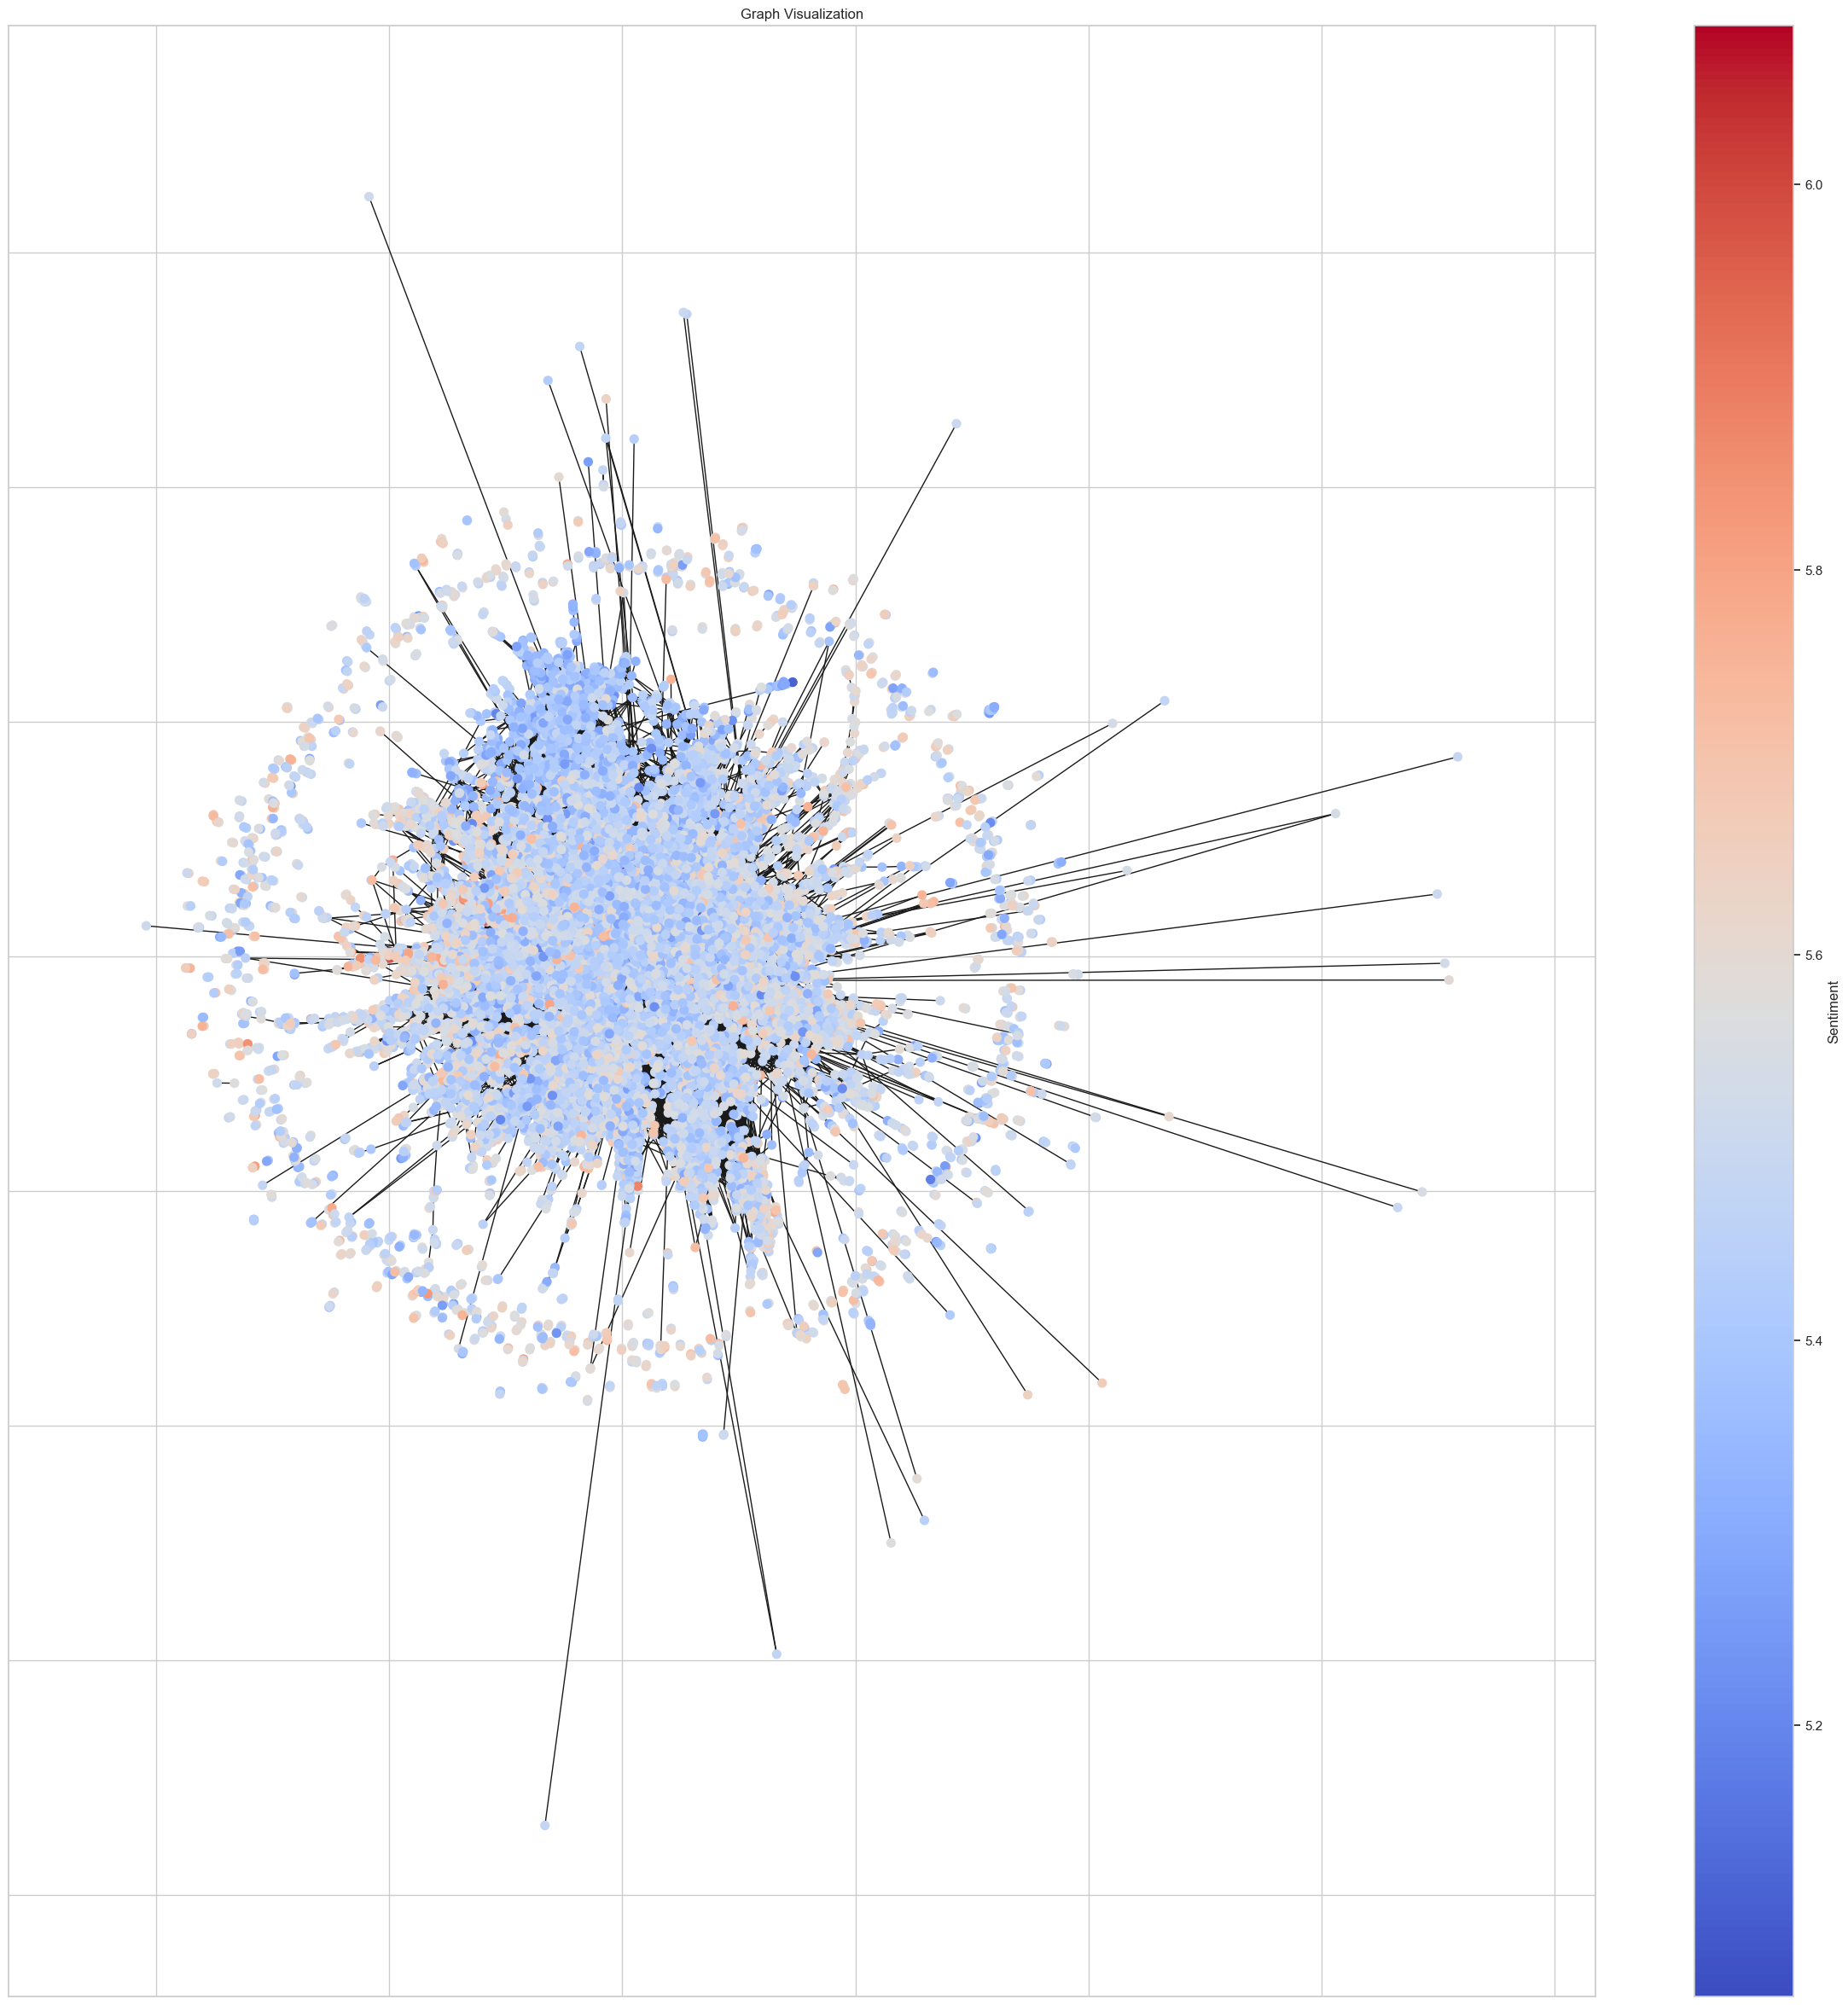

In [172]:
# Plot the graph
plt.figure(figsize=(30, 30))
nodes = nx.draw_networkx(
    H, pos=positions, with_labels=False, node_size=50, cmap=cm.coolwarm, node_color=list(nx.get_node_attributes(H, 'sentiment').values())
)

# Create colorbar
sm = plt.cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=min(node_sentiment.values()), vmax=max(node_sentiment.values())))
sm.set_array([])
plt.colorbar(sm, label='Sentiment')

plt.title("Graph Visualization")
plt.show()

### 3.2 Party partition

In [227]:
P = H.copy()

# color nodes after party ['Democratic', 'Republican', 'Libertarian', 'Green', 'Independent', 'Socialist']
colors = []
for node in P.nodes():
    if P.nodes[node]['party'] == 'Democratic':
        colors.append('blue')
    elif P.nodes[node]['party'] == 'Republican':
        colors.append('red')
    elif P.nodes[node]['party'] == 'Libertarian':
        colors.append('yellow')
    elif P.nodes[node]['party'] == 'Green':
        colors.append('lime')
    elif P.nodes[node]['party'] == 'Independent':
        colors.append('grey')
    elif P.nodes[node]['party'] == 'Socialist':
        colors.append('pink') 

In [178]:
# Initialize ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # linear attraction (default)
    adjustSizes=False,  # Prevent overlap
    edgeWeightInfluence=1.0,

    # Performance and scaling
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,  # Optimize for larger graphs
    barnesHutTheta=1.2,
    scalingRatio=4.0,
    strongGravityMode=False,
    gravity=0.8,
    # Log
    verbose=True
)

# Apply the ForceAtlas2 layout to the graph
positions = forceatlas2.forceatlas2_networkx_layout(P, iterations=100)

100%|██████████| 100/100 [04:04<00:00,  2.44s/it]

BarnesHut Approximation  took  21.65  seconds
Repulsion forces  took  220.28  seconds
Gravitational forces  took  0.32  seconds
Attraction forces  took  0.19  seconds
AdjustSpeedAndApplyForces step  took  1.06  seconds


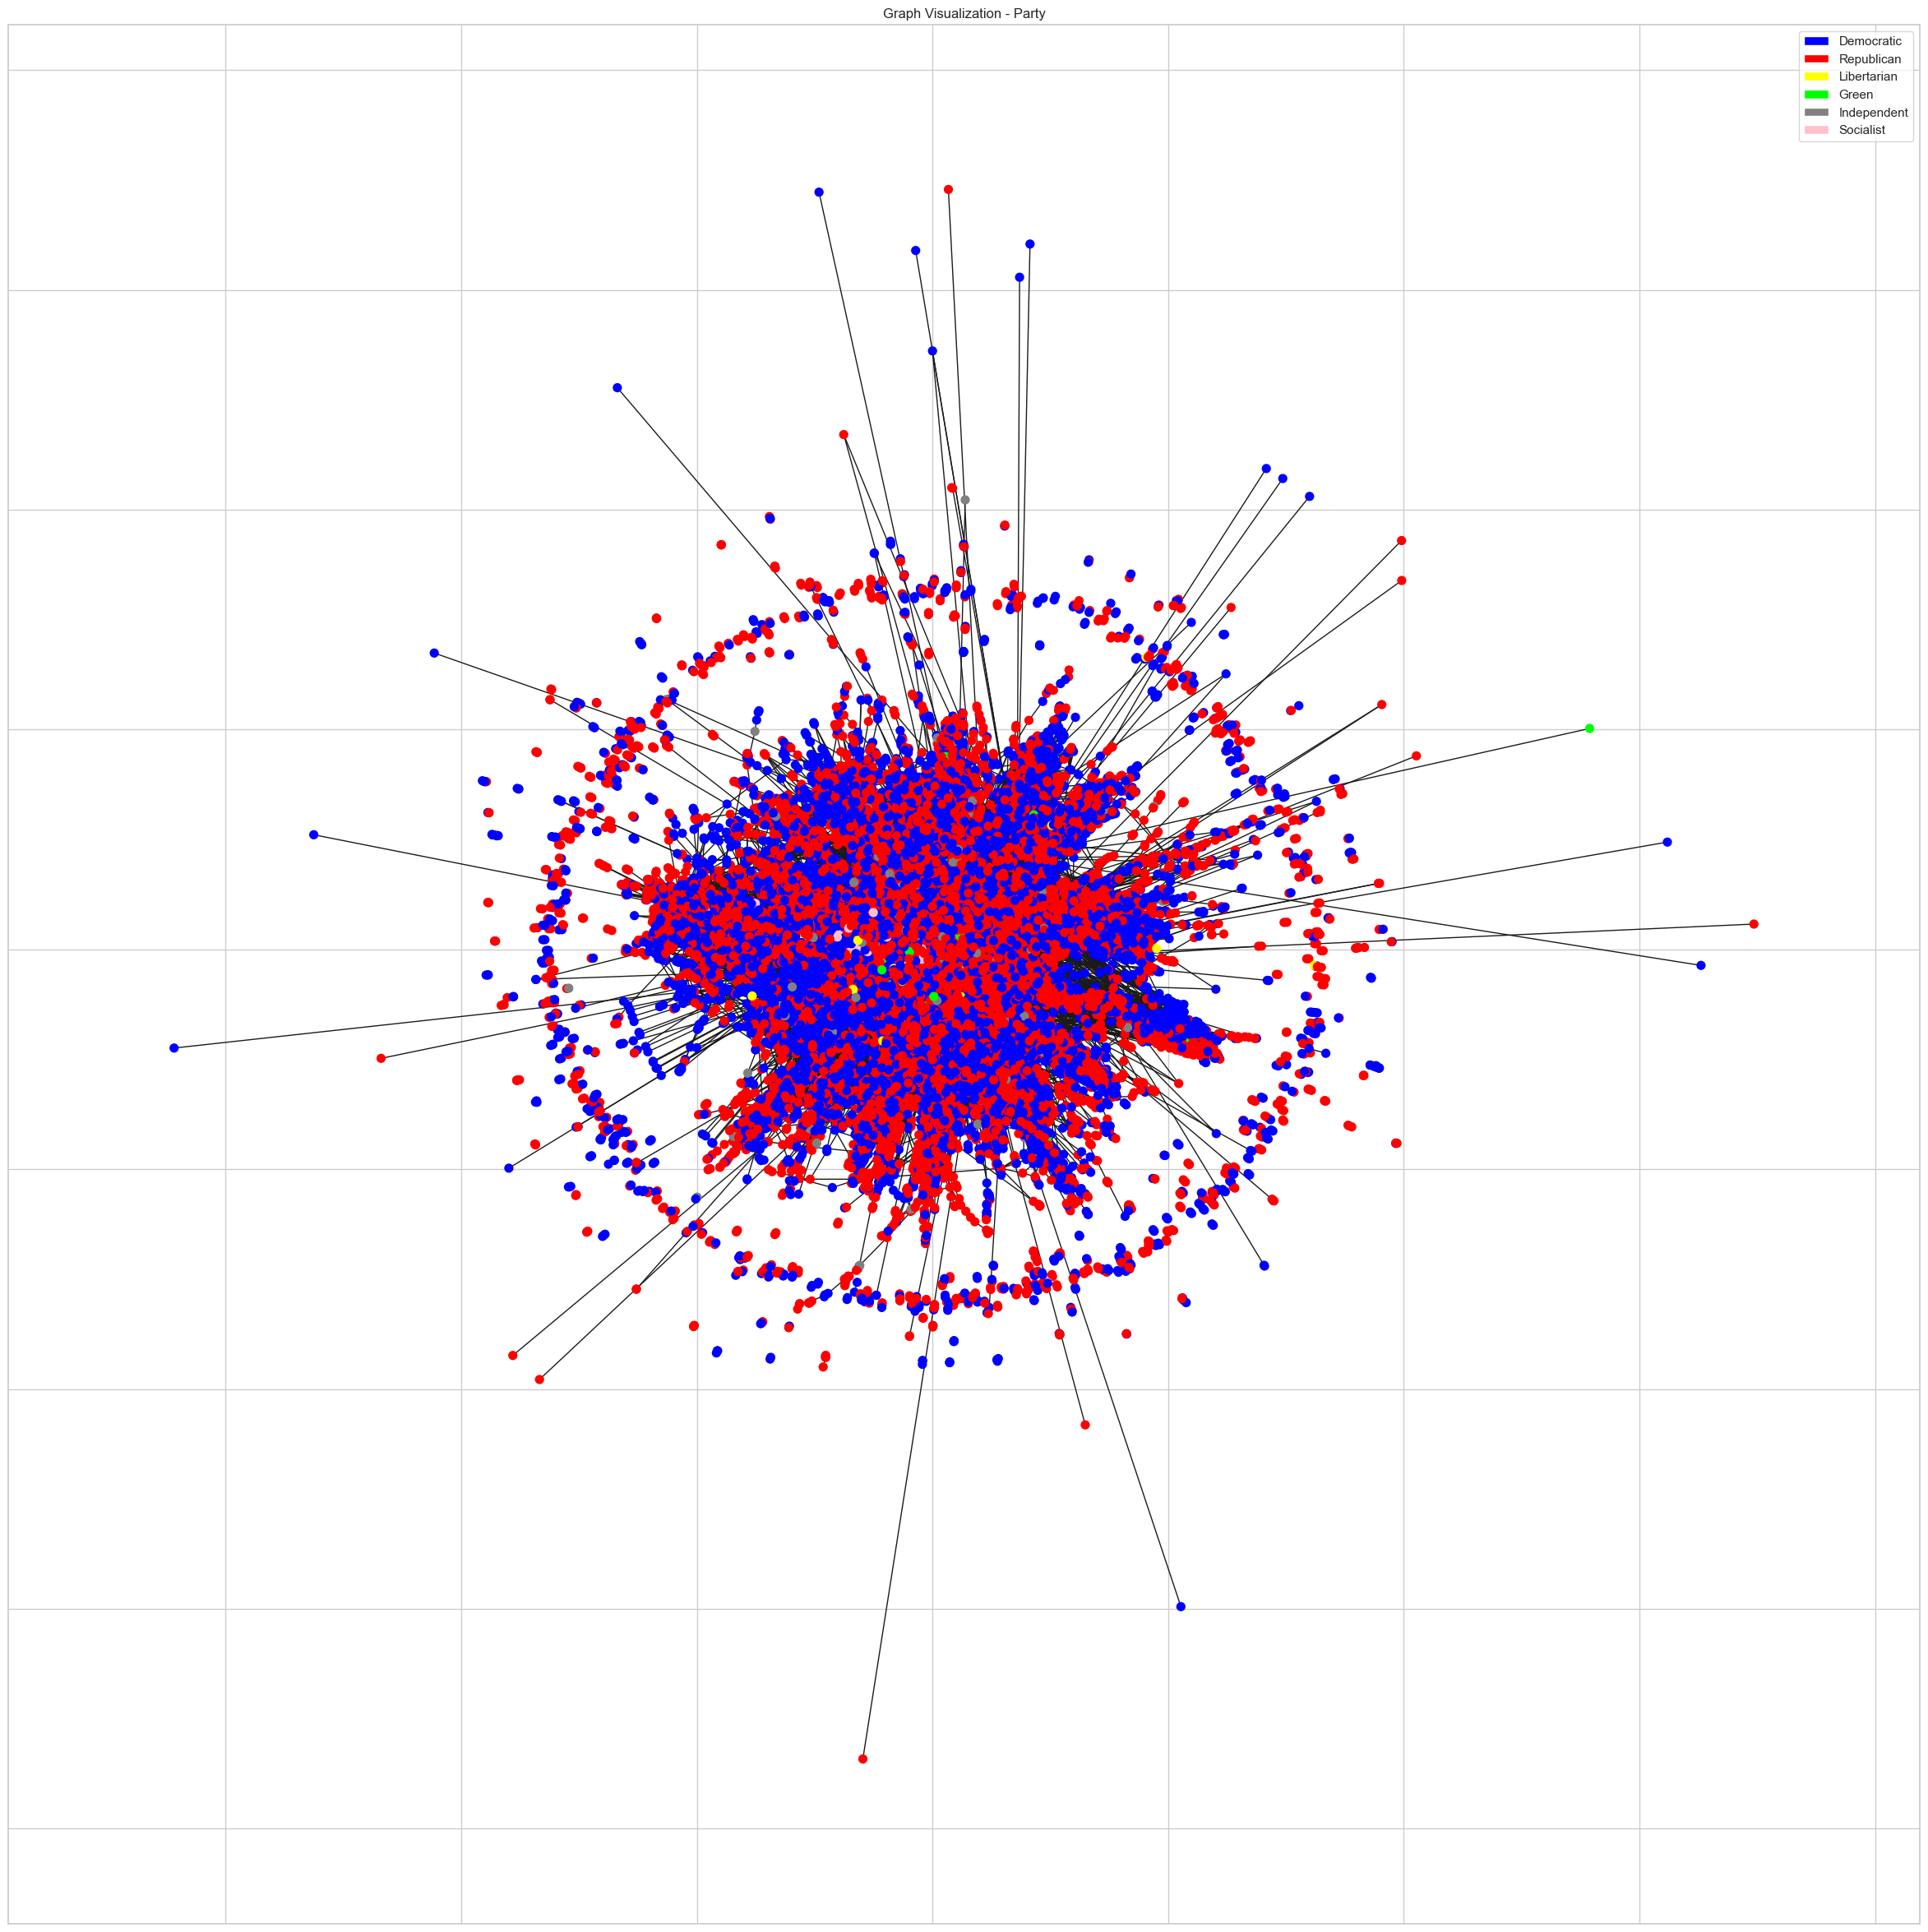

In [228]:
# Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    P, pos=positions, with_labels=False, node_size=50, node_color=colors
)
plt.title("Graph Visualization - Party")

legend_handles = [Patch(facecolor='blue', label='Democratic'),
                  Patch(facecolor='red', label='Republican'),
                  Patch(facecolor='yellow', label='Libertarian'),
                  Patch(facecolor='lime', label='Green'),
                  Patch(facecolor='grey', label='Independent'),
                  Patch(facecolor='pink', label='Socialist')]
plt.legend(handles=legend_handles)

plt.show()

### 3.3 Gender partition

In [180]:
Gender_graph = H.copy()

colors = []
for node in Gender_graph.nodes():
    if Gender_graph.nodes[node]['gender'] == 'female':
        colors.append('violet')
    else:
        colors.append('darkblue')   

In [181]:
# Initialize ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # linear attraction (default)
    adjustSizes=False,  # Prevent overlap
    edgeWeightInfluence=1.0,

    # Performance and scaling
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,  # Optimize for larger graphs
    barnesHutTheta=1.2,
    scalingRatio=4.0,
    strongGravityMode=False,
    gravity=0.8,
    # Log
    verbose=True
)

# Apply the ForceAtlas2 layout to the graph
positions = forceatlas2.forceatlas2_networkx_layout(Gender_graph, iterations=100)

100%|██████████| 100/100 [03:35<00:00,  2.16s/it]

BarnesHut Approximation  took  21.51  seconds
Repulsion forces  took  191.47  seconds
Gravitational forces  took  0.31  seconds
Attraction forces  took  0.22  seconds
AdjustSpeedAndApplyForces step  took  1.10  seconds


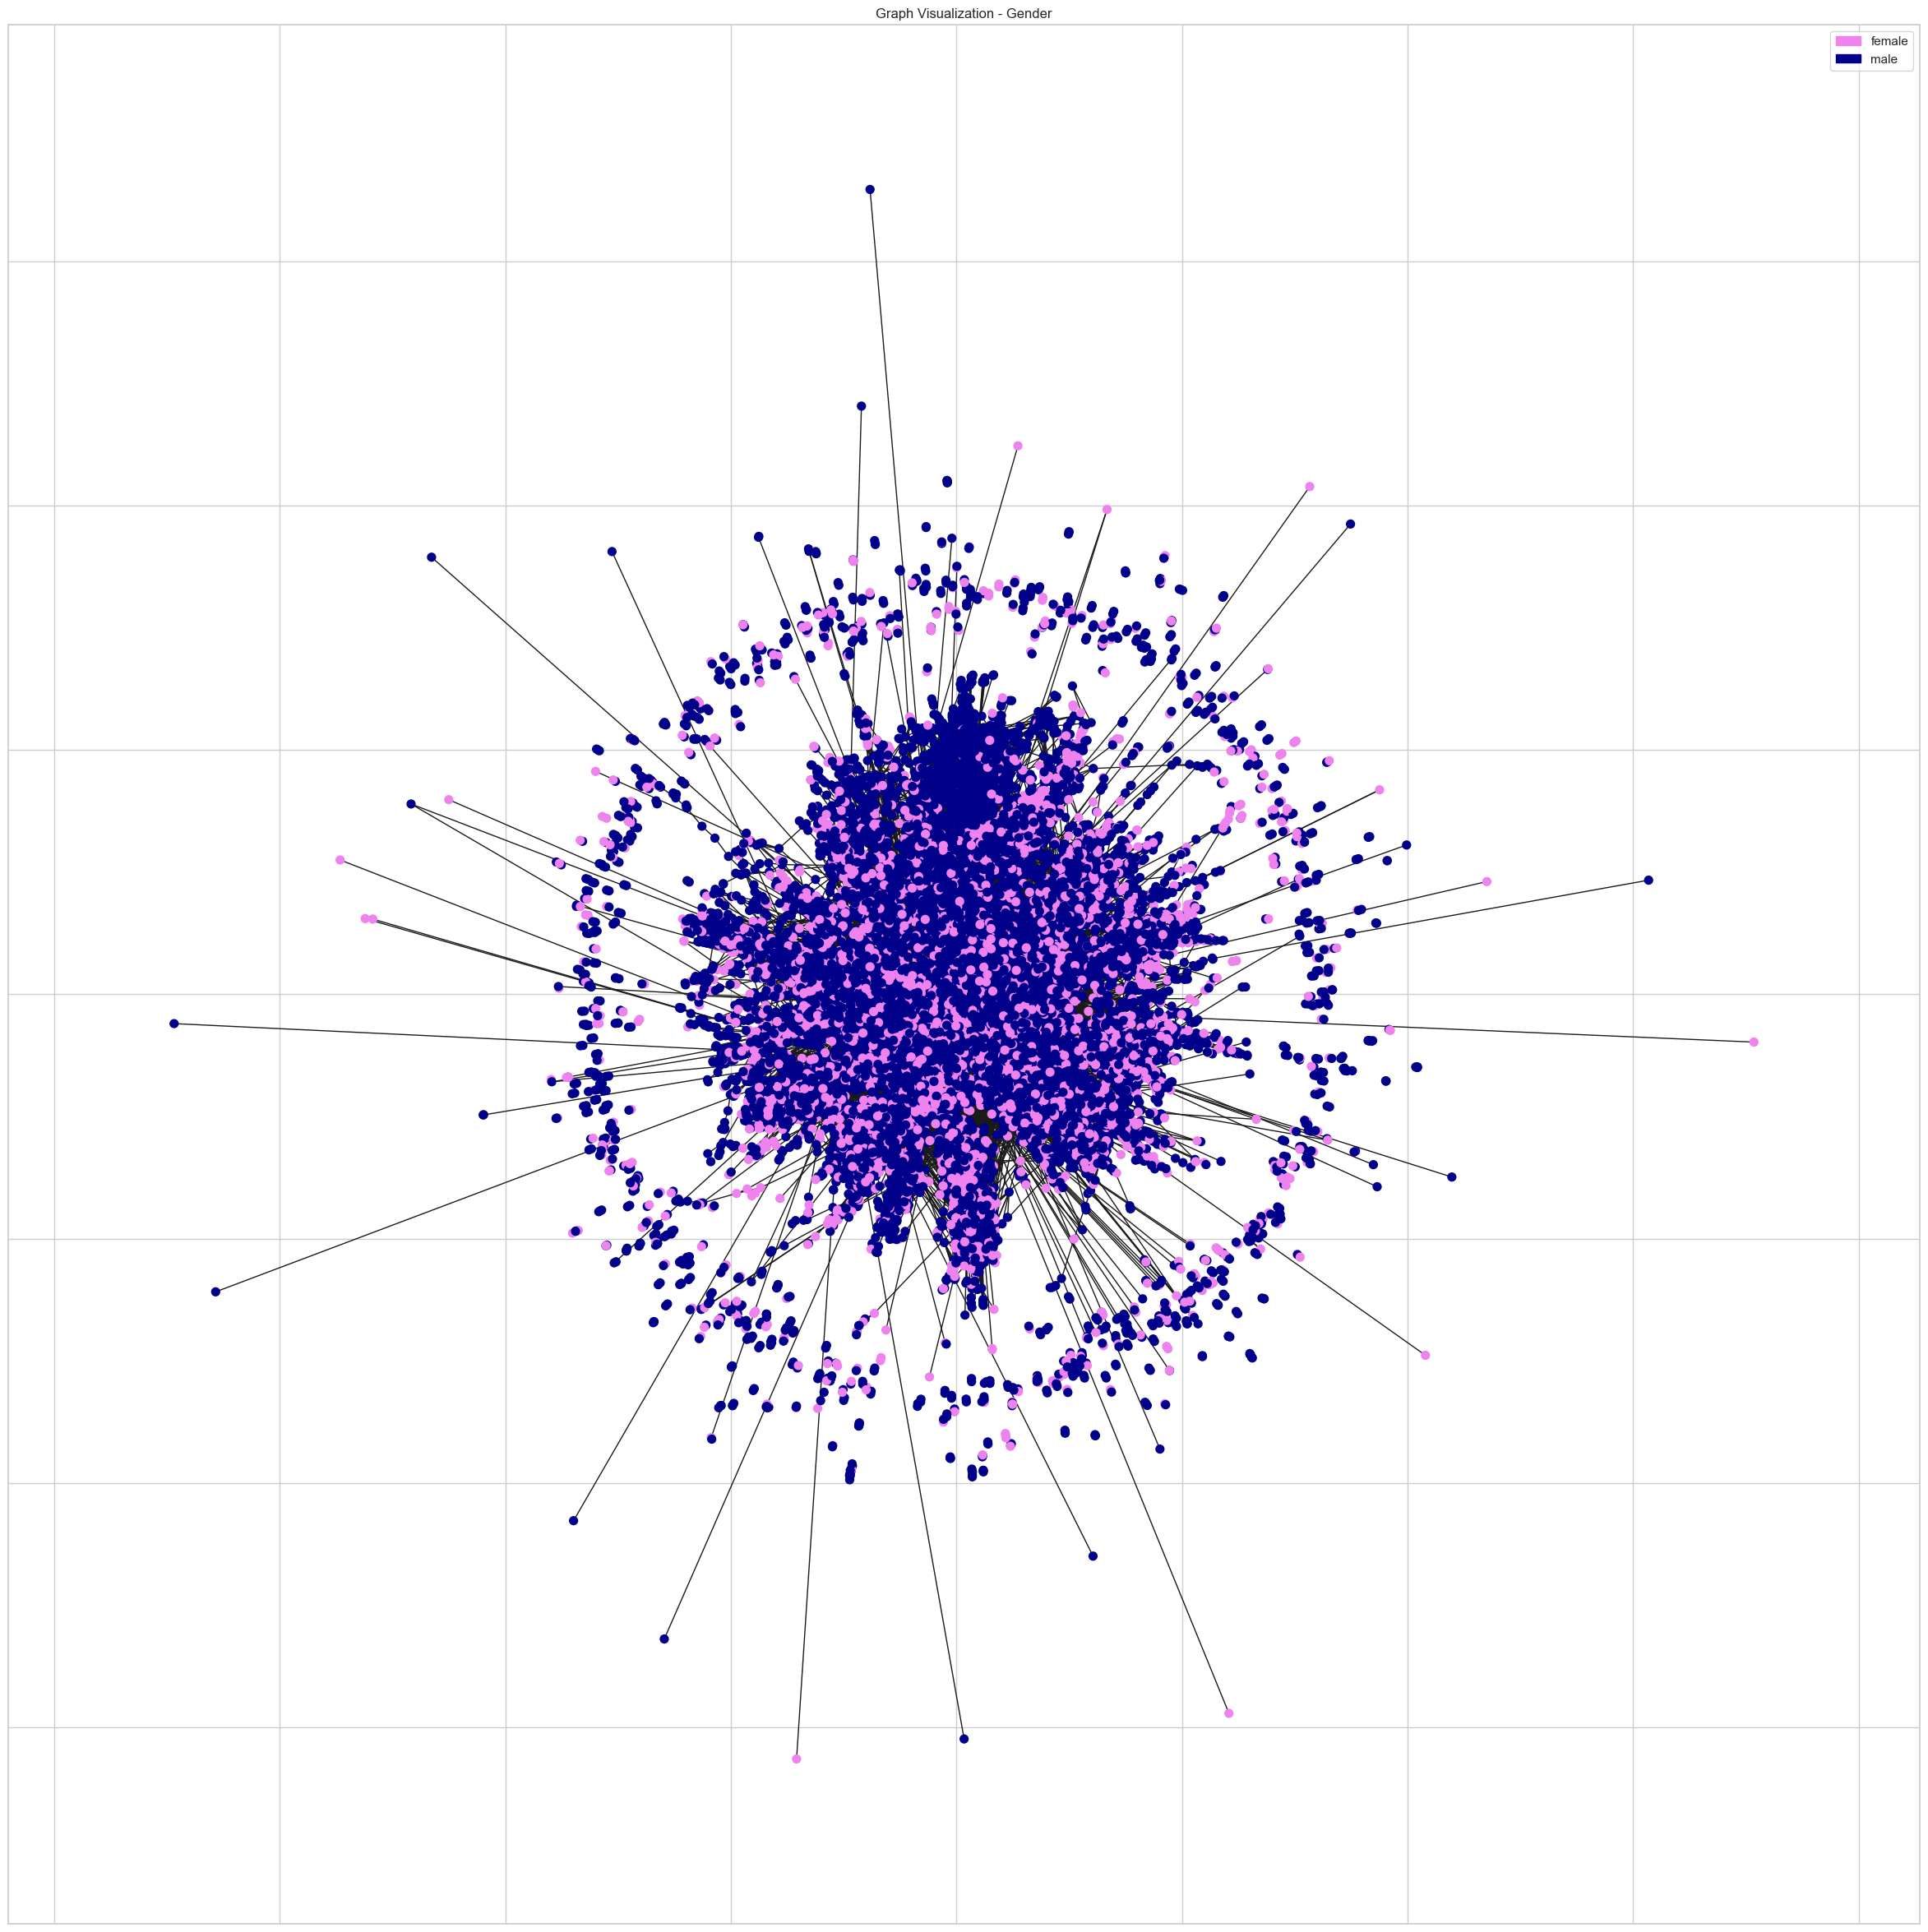

In [ ]:
# Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    Gender_graph, pos=positions, with_labels=False, node_size=50, node_color=colors
)
plt.title("Graph Visualization - Gender")

legend_handles = [Patch(color='violet', label='female'), Patch(color='darkblue', label='male')]
plt.legend(handles=legend_handles)

plt.show()

### 3.4 Louvain partition

In [242]:
L = H.copy()
colors = []
nodes_to_remove = []

for node in L.nodes():
    for i, (community, _) in enumerate(most_common_communities):
        if louvain_partition[node] == community:
            colors.append(i)
            break
    else:
        nodes_to_remove.append(node)

L.remove_nodes_from(nodes_to_remove)

In [246]:
L = H.copy()
colors = []

for node in L.nodes():
    for i, (community, _) in enumerate(most_common_communities):
        if louvain_partition[node] == community:
            colors.append(i)
            break
    else:
        colors.append(len(most_common_communities))  # Assign a numerical value for 'grey'

In [225]:
# Initialize ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # linear attraction (default)
    adjustSizes=False,  # Prevent overlap
    edgeWeightInfluence=1.0,

    # Performance and scaling
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,  # Optimize for larger graphs
    barnesHutTheta=1.2,
    scalingRatio=4.0,
    strongGravityMode=False,
    gravity=0.8,
    # Log
    verbose=True
)

# Apply the ForceAtlas2 layout to the graph
positions = forceatlas2.forceatlas2_networkx_layout(L, iterations=100)

100%|██████████| 100/100 [04:23<00:00,  2.64s/it]

BarnesHut Approximation  took  25.20  seconds
Repulsion forces  took  235.31  seconds
Gravitational forces  took  0.31  seconds
Attraction forces  took  0.32  seconds
AdjustSpeedAndApplyForces step  took  1.27  seconds


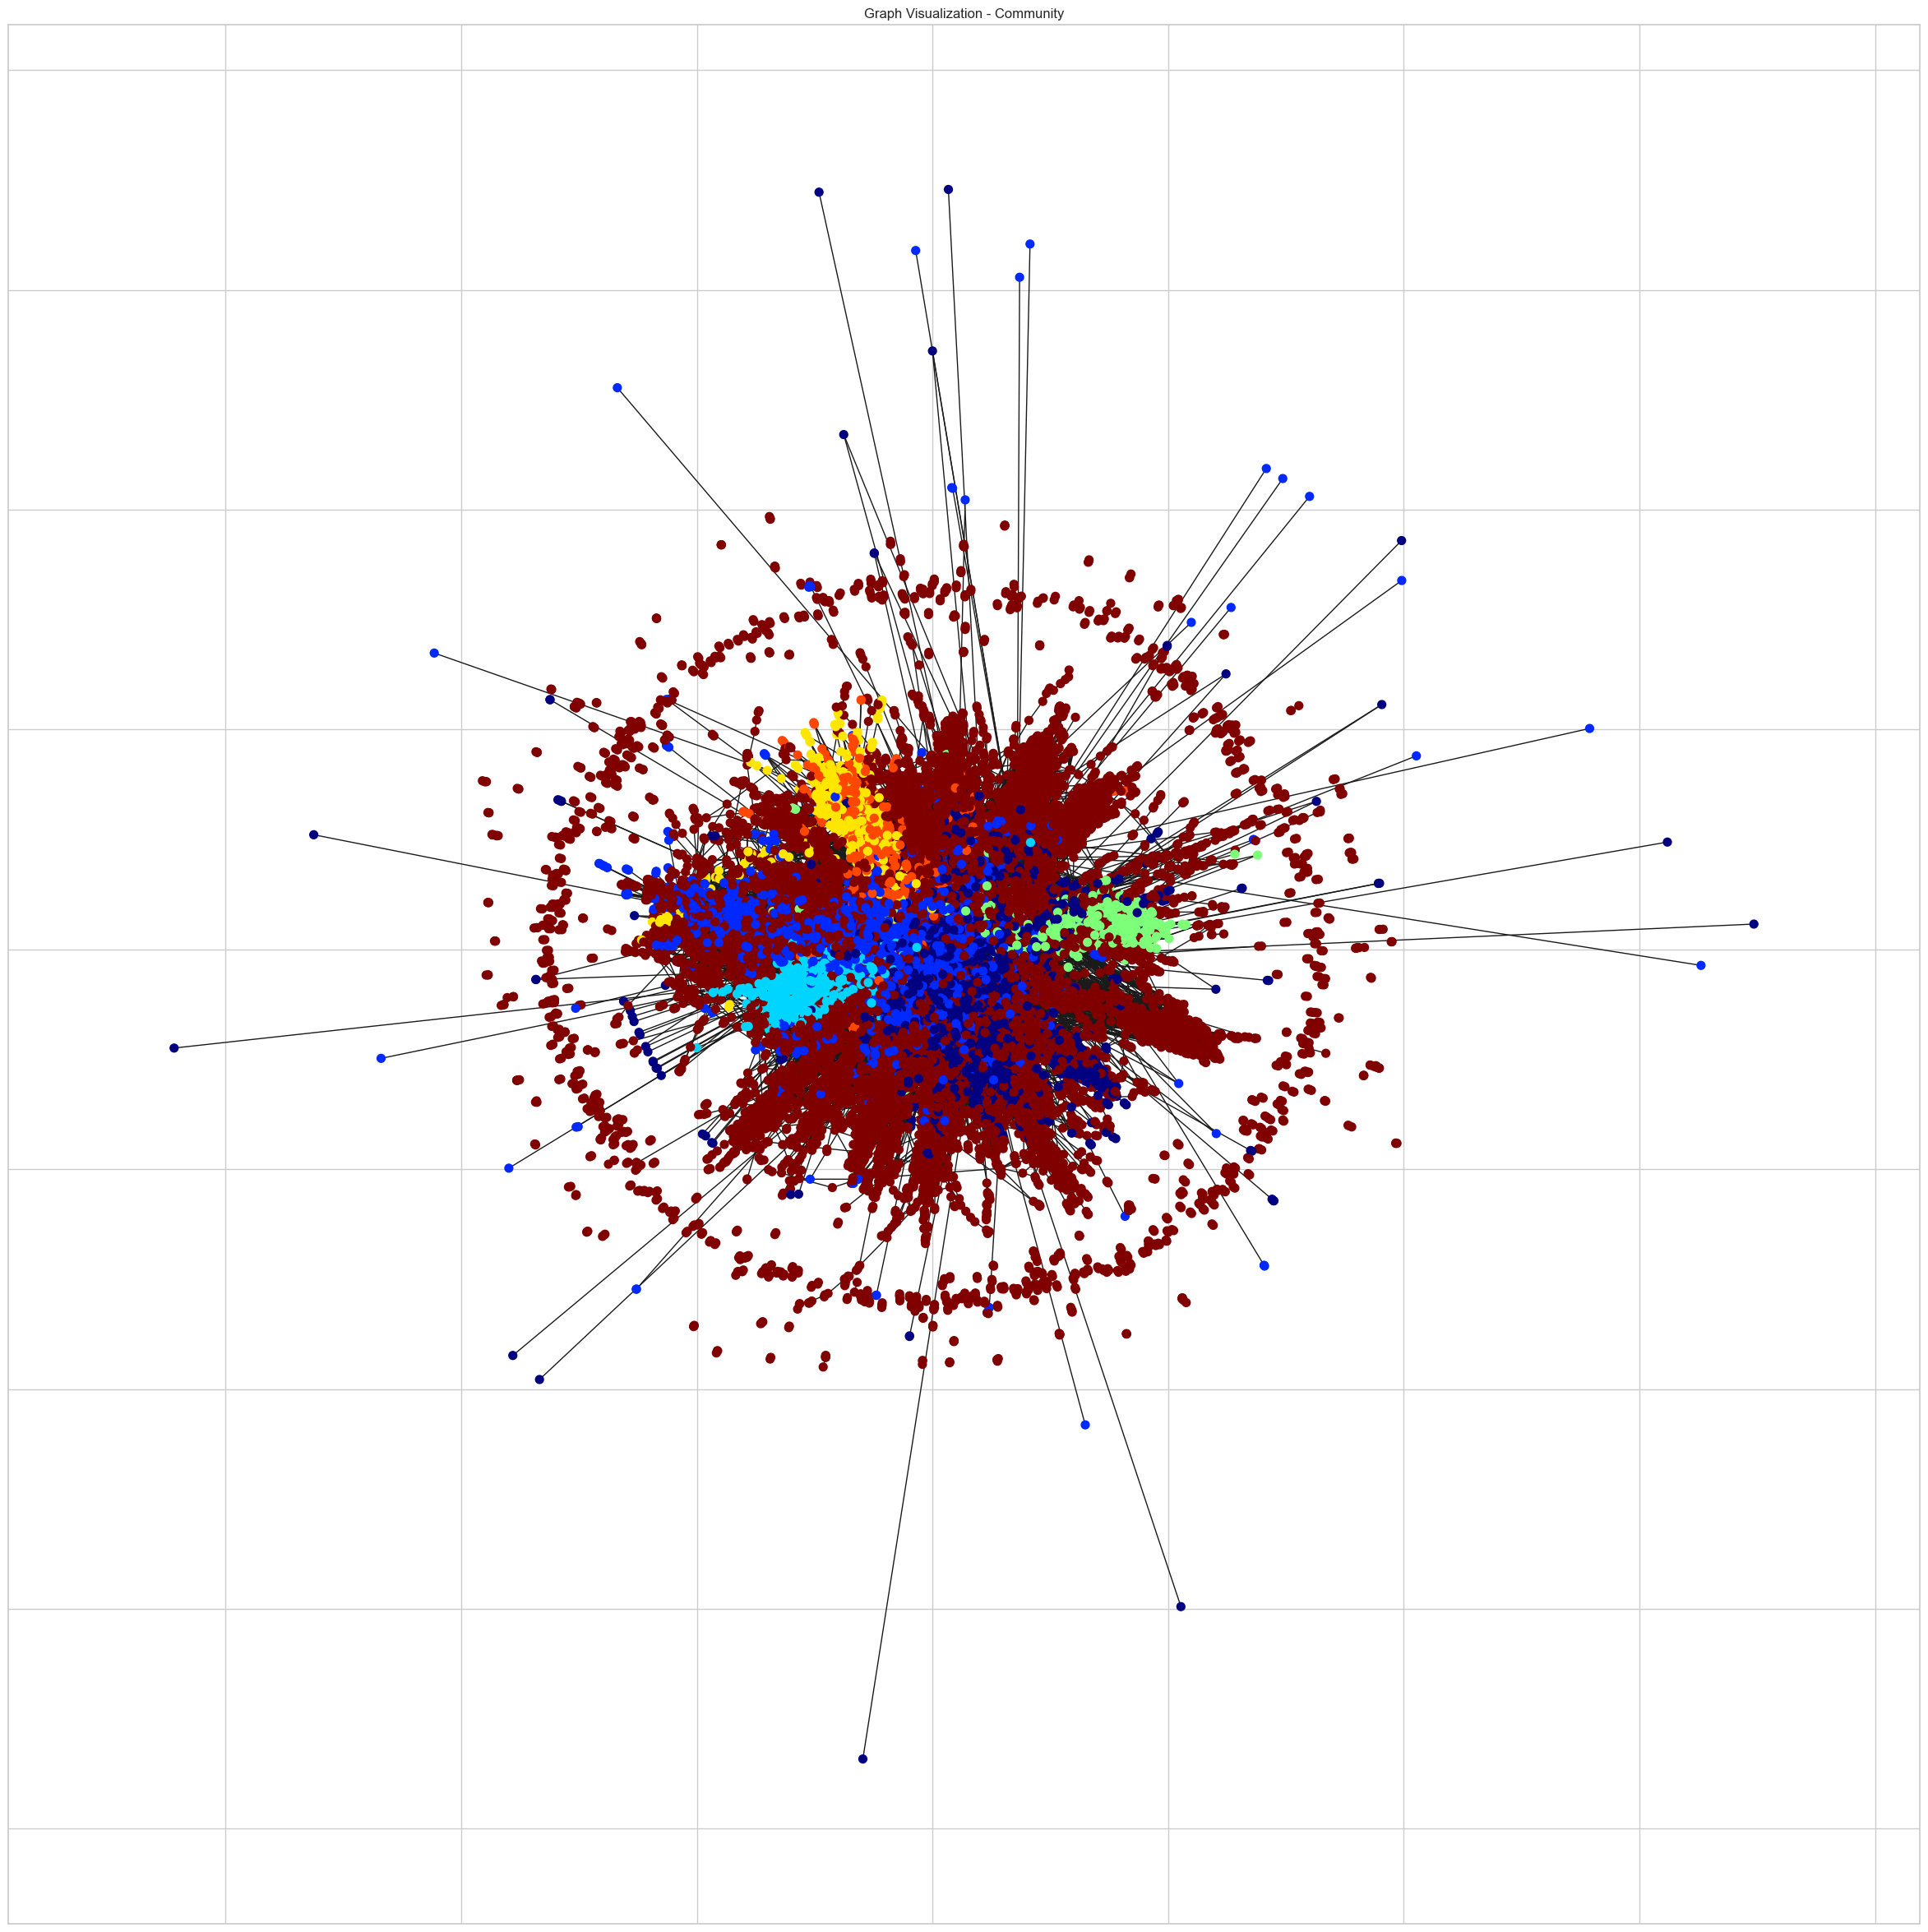

In [249]:
# Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    L, pos=positions, with_labels=False, node_size=50, node_color=colors, cmap=cm.jet)

plt.title("Graph Visualization - Community")


plt.show()